In [1]:
#importing the required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("Project Dataset - Sheet1.csv")

In [3]:
train.head()

,Name,Gender,State,Region,FatherIncome,MotherIncome,Bank,EducationCategory,Educationlevel,PrivateOrGovColleges,LoanAmount,LoanTimePeriod,RepaidByOwnOrByParents,SecuredOrUnsecuredLoan,LoanRepaymentStatus,%ofLoanRepaid,Employed
0,LP001002,Male,west bengal,Urban,5849,0.0,Commercial-private bank,Arts,junior college,private,NaN,360.0,By parents,Unsecured,Y,100.0,No
1,LP001003,Male,MadhyaPradesh,Rural,4583,1508.0,Co-operative bank,Management /Finance,under graduation,private,128.0,360.0,By own,Secured,N,50.0,No
2,LP001005,Male,MadhyaPradesh,Urban,3000,0.0,NBFC,Technical,post graduation,government,66.0,360.0,By parents,Secured,Y,100.0,Yes
3,LP001006,Male,Assam,Urban,2583,2358.0,Commercial -gov-Bank,Medical,doctorate,private,120.0,360.0,By own,Unsecured,Y,100.0,No
4,LP001008,Male,Uttarakhand,Rural,6000,0.0,Regional Rural Banks,Pure sciences,post graduation,government,141.0,360.0,By parents,Unsecured,Y,100.0,No


In [4]:
# #creating new column -- EWS

train.loc[(train["FatherIncome"]+train["MotherIncome"])<= 4000,"EWS"] = "Yes"
train.loc[(train["FatherIncome"]+train["MotherIncome"]) > 4000,"EWS"] = "No"

In [5]:
train.sample(10)

,Name,Gender,State,Region,FatherIncome,MotherIncome,Bank,EducationCategory,Educationlevel,PrivateOrGovColleges,LoanAmount,LoanTimePeriod,RepaidByOwnOrByParents,SecuredOrUnsecuredLoan,LoanRepaymentStatus,%ofLoanRepaid,Employed,EWS
225,LP001751,Male,UP,Rural,3250,0.0,Commercial-private bank,Medical,under graduation,government,170.0,360.0,By parents,Secured,N,90.0,No,Yes
105,LP001367,Male,Punjab,Rural,3052,1030.0,Regional Rural Banks,Pure sciences,doctorate,private,100.0,360.0,By parents,Unsecured,Y,100.0,No,No
495,LP002586,Female,Karnataka,Semiurban,3326,913.0,Commercial-private bank,Management /Finance,under graduation,government,105.0,84.0,By own,Secured,Y,100.0,No,No
582,LP002894,Female,Delhi,Semiurban,3166,0.0,NBFC,Medical,post graduation,private,36.0,360.0,By parents,Secured,Y,100.0,No,Yes
541,LP002743,Female,TamilNadu,Semiurban,2138,0.0,Co-operative bank,Medical,post graduation,private,99.0,360.0,By parents,Unsecured,N,70.0,No,Yes
378,LP002224,Male,Karnataka,Rural,3069,0.0,Regional Rural Banks,Pure sciences,under graduation,government,71.0,480.0,By parents,Secured,N,35.0,No,Yes
379,LP002225,Male,Rajasthan,Urban,5391,0.0,Co-operative bank,Technical,post graduation,private,130.0,360.0,By own,Unsecured,Y,100.0,No,No
220,LP001736,Male,Punjab,Urban,2221,0.0,Co-operative bank,Commerce,junior college,private,60.0,360.0,By own,Unsecured,N,75.0,No,Yes
486,LP002545,Male,Maharshtra,Rural,3547,0.0,NaN,Medical,under graduation,private,80.0,360.0,By parents,Unsecured,N,60.0,No,Yes
397,LP002281,Male,MadhyaPradesh,Urban,3033,1459.0,Commercial -gov-Bank,Technical,post graduation,government,95.0,360.0,By own,Secured,Y,100.0,No,No


In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    598 non-null    object 
 1   Gender                  585 non-null    object 
 2   State                   597 non-null    object 
 3   Region                  598 non-null    object 
 4   FatherIncome            598 non-null    int64  
 5   MotherIncome            598 non-null    float64
 6   Bank                    590 non-null    object 
 7   EducationCategory       598 non-null    object 
 8   Educationlevel          588 non-null    object 
 9   PrivateOrGovColleges    590 non-null    object 
 10  LoanAmount              577 non-null    float64
 11  LoanTimePeriod          584 non-null    float64
 12  RepaidByOwnOrByParents  590 non-null    object 
 13  SecuredOrUnsecuredLoan  590 non-null    object 
 14  LoanRepaymentStatus     598 non-null    ob

In [7]:
train.describe().T #to view the statistical properties in horizontal form

,count,mean,std,min,25%,50%,75%,max
FatherIncome,598.0,5413.091973,6171.529241,150.0,2873.5,3806.0,5786.5,81000.0
MotherIncome,598.0,1566.528294,2457.840290,0.0,0.0,1211.5,2281.0,33837.0
LoanAmount,577.0,145.374350,84.657594,9.0,100.0,126.0,165.0,700.0
LoanTimePeriod,584.0,342.431507,64.919891,12.0,360.0,360.0,360.0,480.0
%ofLoanRepaid,595.0,88.042017,19.522669,30.0,75.0,100.0,100.0,100.0


In [8]:
train.columns

Index(['Name', 'Gender', 'State', 'Region', 'FatherIncome', 'MotherIncome',
       'Bank', 'EducationCategory', 'Educationlevel', 'PrivateOrGovColleges',
       'LoanAmount', 'LoanTimePeriod', 'RepaidByOwnOrByParents',
       'SecuredOrUnsecuredLoan', 'LoanRepaymentStatus', '%ofLoanRepaid',
       'Employed', 'EWS'],
      dtype='object')

In [9]:
train.shape

(598, 18)

In [10]:
train["LoanRepaymentStatus"].count()  #size of Loan_Status--gives a non null count of that feature

598

# Data Visualization

In [11]:
#A PivotTable is a way to quickly summarize large amounts of data.
#You can use a PivotTable to analyze numerical data in detail, and answer unanticipated questions about your data. 
#A PivotTable is especially designed for: Querying large amounts of data 

print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'Gender',
                     values = 'Region' ,aggfunc ='count'))
print()


print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'Employed', 
                     values = 'Region' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'EWS', 
                     values = 'Region' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'State', 
                     values = 'Region' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'Bank', 
                     values = 'Region' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'EducationCategory', 
                     values = 'Region' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'Educationlevel', 
                     values = 'Region' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'PrivateOrGovColleges', 
                     values = 'Region' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'RepaidByOwnOrByParents', 
                     values = 'Region' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'LoanRepaymentStatus', columns = 'SecuredOrUnsecuredLoan', 
                     values = 'Region' ,aggfunc ='count'))
print()

Gender               Female  Male
LoanRepaymentStatus              
N                        35   149
Y                        73   328

Employed              No  Yes
LoanRepaymentStatus          
N                    156   25
Y                    332   55

EWS                   No  Yes
LoanRepaymentStatus          
N                    143   46
Y                    313   96

State                Andhra Pradesh  Assam  Delhi  Gujarat  Karnataka  Kerala  \
LoanRepaymentStatus                                                             
N                                17      3     13       19         18      17   
Y                                34      8     37       38         25      35   

State                MadhyaPradesh  Maharshtra  Punjab  Rajasthan  TamilNadu  \
LoanRepaymentStatus                                                            
N                                9          13      22         10         12   
Y                               32          32      31  

In [12]:
train["LoanRepaymentStatus"].value_counts(normalize=True)*100 #returns percentage of yes and no

Y    68.394649
N    31.605351
Name: LoanRepaymentStatus, dtype: float64

<AxesSubplot:title={'center':'Loan_Status'}>

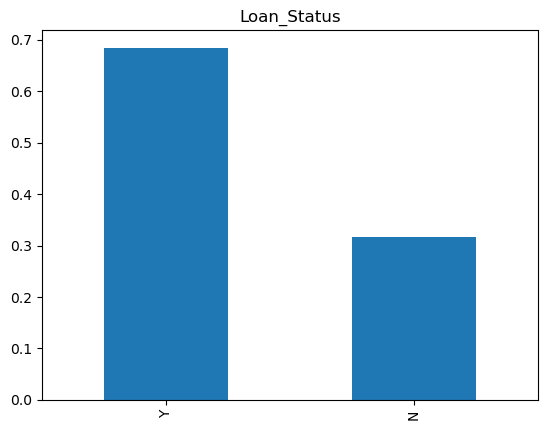

In [13]:
train["LoanRepaymentStatus"].value_counts(normalize=True).plot.bar(title = 'Loan_Status') #this gives a bar graph

In [14]:
train["Gender"].count()  #size of Gender



585

In [15]:
train["Gender"].value_counts() #returns number of males and females

Male      477
Female    108
Name: Gender, dtype: int64

In [16]:
train["Gender"].value_counts(normalize=True)*100 #returns percentage of male and female

Male      81.538462
Female    18.461538
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

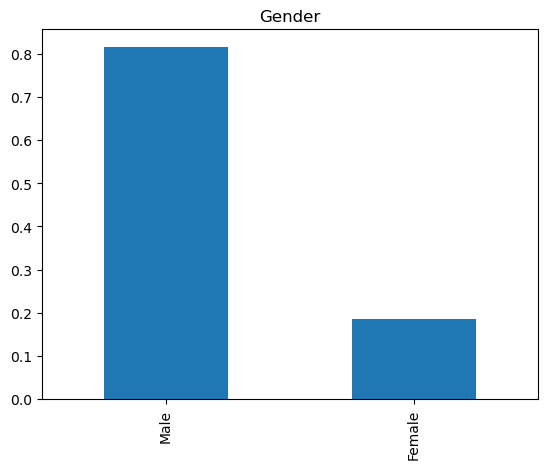

In [17]:
train["Gender"].value_counts(normalize=True).plot.bar(title = 'Gender')

In [18]:
train["State"].value_counts(normalize=True)*100

Gujarat           9.547739
Punjab            8.877722
Kerala            8.710218
Andhra Pradesh    8.542714
Delhi             8.375209
TamilNadu         8.207705
Maharshtra        7.537688
UP                7.537688
Rajasthan         7.370184
Karnataka         7.202680
MadhyaPradesh     6.867672
Uttarakhand       5.527638
west bengal       3.852596
Assam             1.842546
Name: State, dtype: float64

<AxesSubplot:title={'center':'State'}>

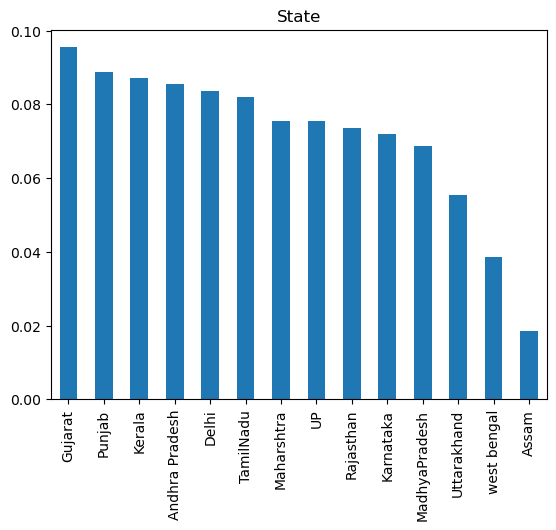

In [19]:
train["State"].value_counts(normalize=True).plot.bar(title = 'State')

<AxesSubplot:title={'center':'Region'}>

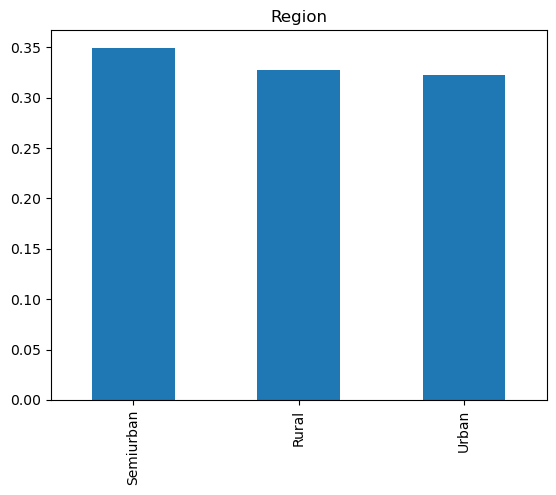

In [20]:
train["Region"].value_counts(normalize=True).plot.bar(title = 'Region')

<AxesSubplot:title={'center':'Type of Bank'}>

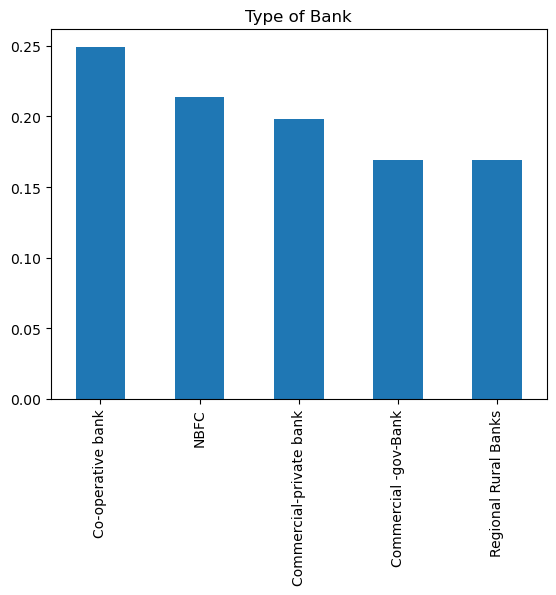

In [21]:
train["Bank"].value_counts(normalize=True).plot.bar(title = 'Type of Bank')

<AxesSubplot:title={'center':'Education-Category'}>

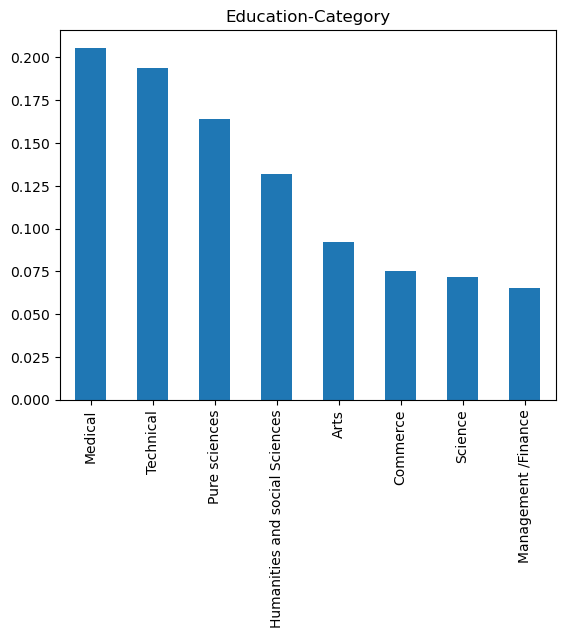

In [22]:
train["EducationCategory"].value_counts(normalize=True).plot.bar(title = 'Education-Category')

<AxesSubplot:title={'center':'Education level'}>

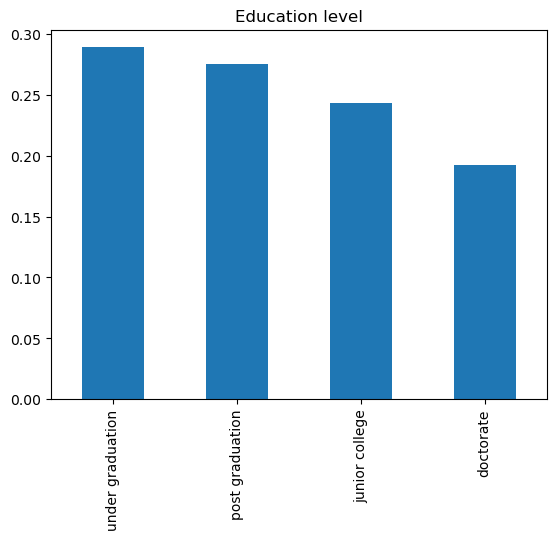

In [23]:
train["Educationlevel"].value_counts(normalize=True).plot.bar(title = 'Education level')

<AxesSubplot:title={'center':'Type of colleges'}>

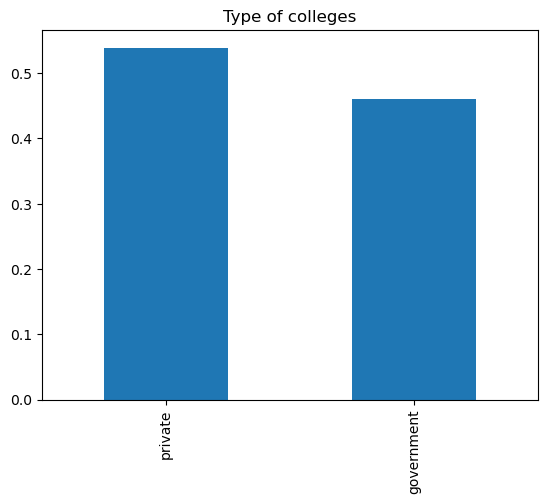

In [24]:
train["PrivateOrGovColleges"].value_counts(normalize=True).plot.bar(title = 'Type of colleges')

<AxesSubplot:title={'center':'Repaid by own or by parents'}>

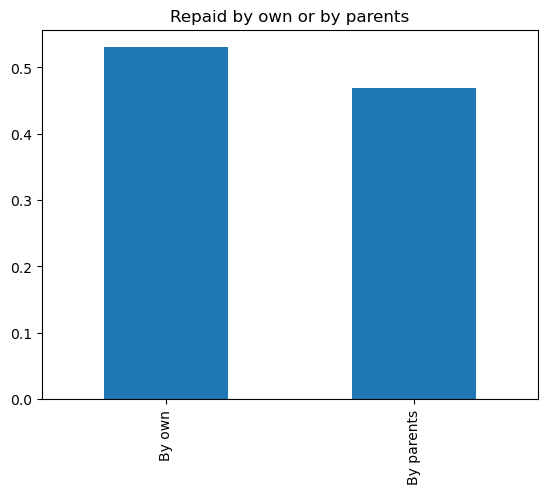

In [25]:
train["RepaidByOwnOrByParents"].value_counts(normalize=True).plot.bar(title = 'Repaid by own or by parents')

<AxesSubplot:title={'center':'Secured/unsecured loan'}>

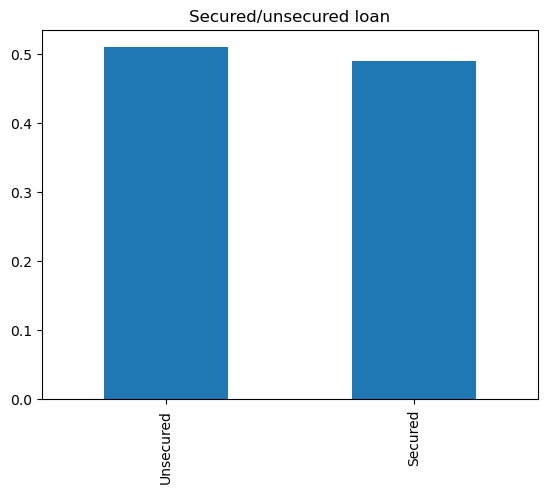

In [26]:
train["SecuredOrUnsecuredLoan"].value_counts(normalize=True).plot.bar(title = 'Secured/unsecured loan')

<AxesSubplot:title={'center':'Current satus of employment'}>

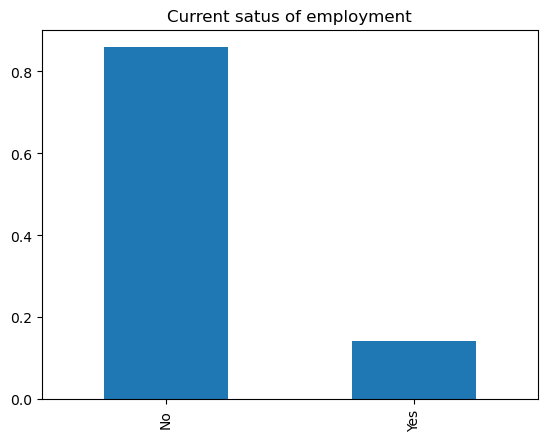

In [27]:
train["Employed"].value_counts(normalize=True).plot.bar(title = 'Current satus of employment')

<AxesSubplot:title={'center':'EWS'}>

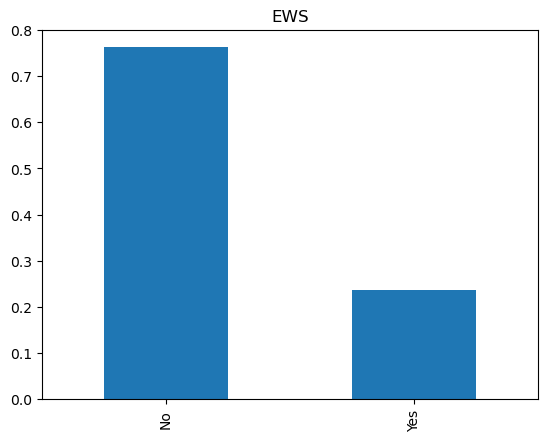

In [28]:
train["EWS"].value_counts(normalize=True).plot.bar(title = 'EWS')

# Boxplots

<AxesSubplot:>

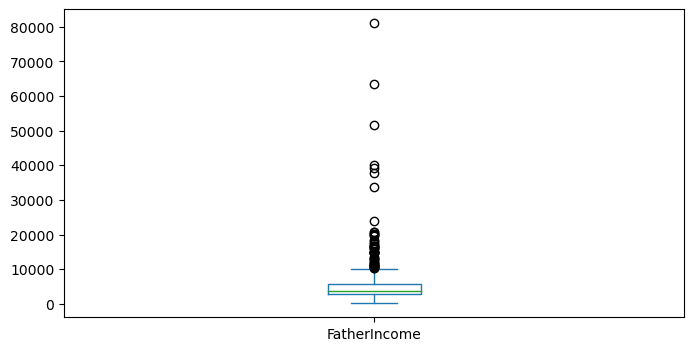

In [29]:
train["FatherIncome"].plot.box(figsize=(8,4))

<AxesSubplot:>

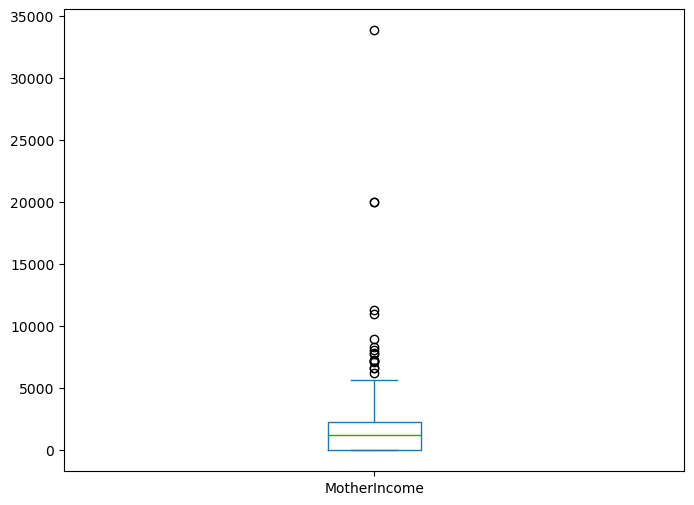

In [30]:
train["MotherIncome"].plot.box(figsize=(8,6))


<AxesSubplot:>

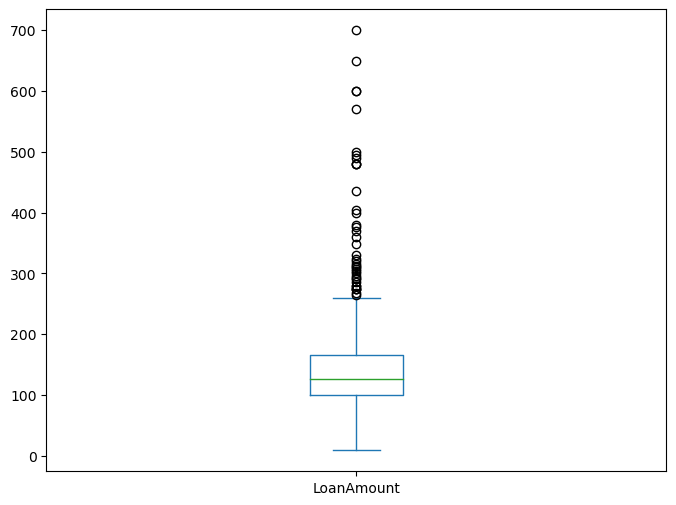

In [31]:
train["LoanAmount"].plot.box(figsize=(8,6))

<AxesSubplot:>

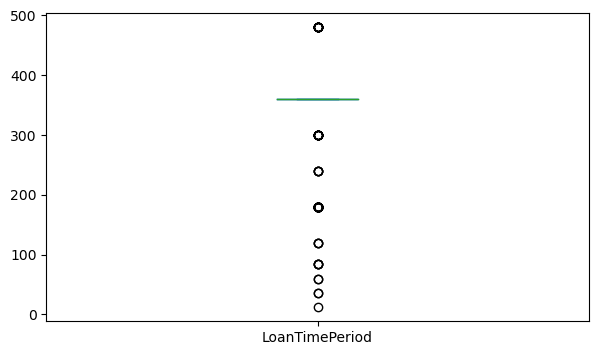

In [32]:
train["LoanTimePeriod"].plot.box(figsize=(7,4))

<AxesSubplot:>

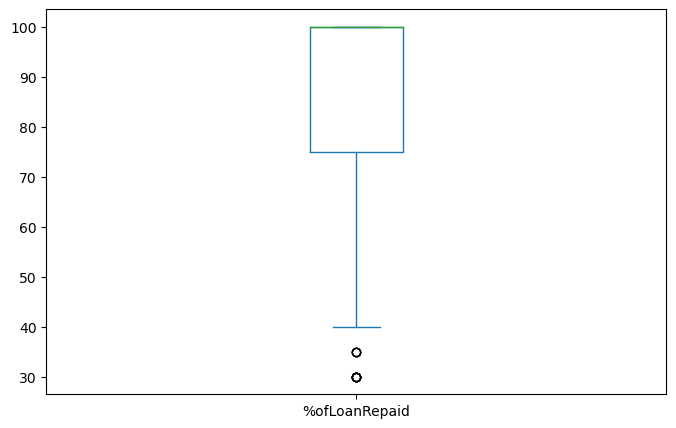

In [33]:
train["%ofLoanRepaid"].plot.box(figsize=(8,5))

# Histograms

In [34]:
df_num = train[["MotherIncome","FatherIncome","LoanAmount","LoanTimePeriod","%ofLoanRepaid"]]

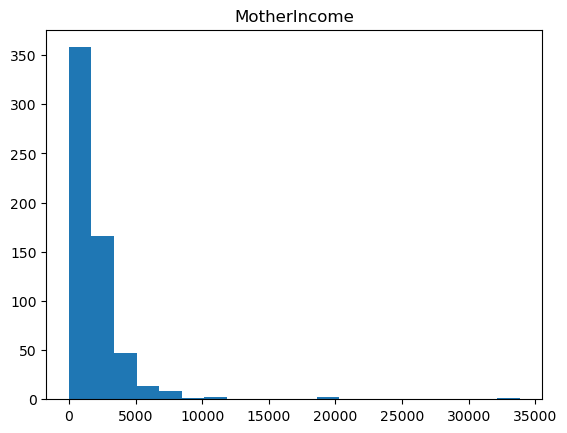

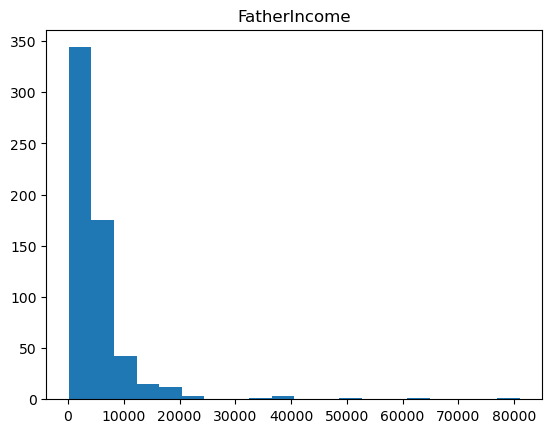

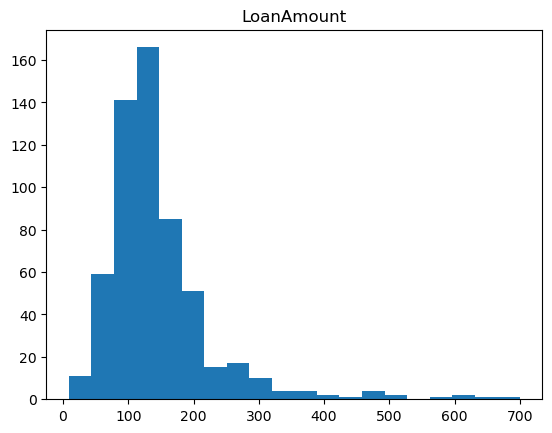

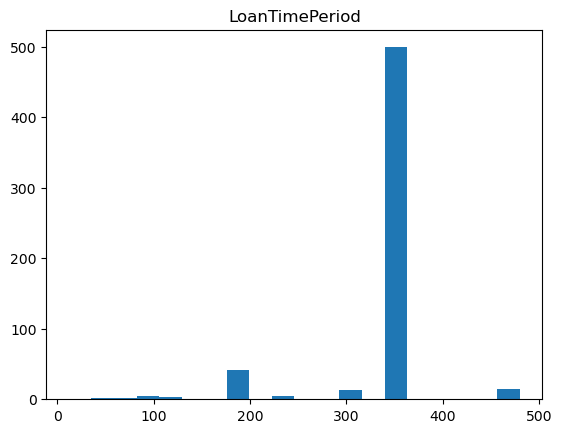

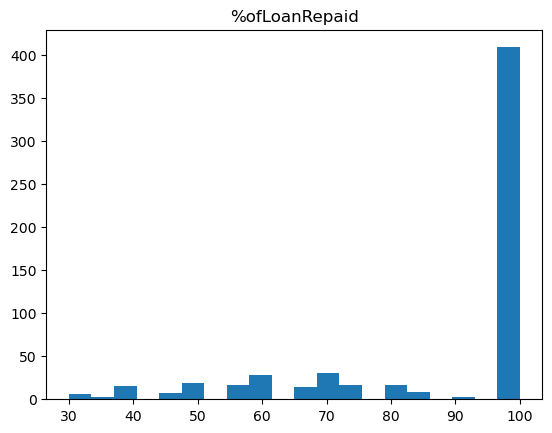

In [35]:
for i in df_num.columns:
    plt.hist(df_num[i],bins=20)
    plt.title(i)
    plt.show()

AxesSubplot(0.1,0.15;0.8x0.75)


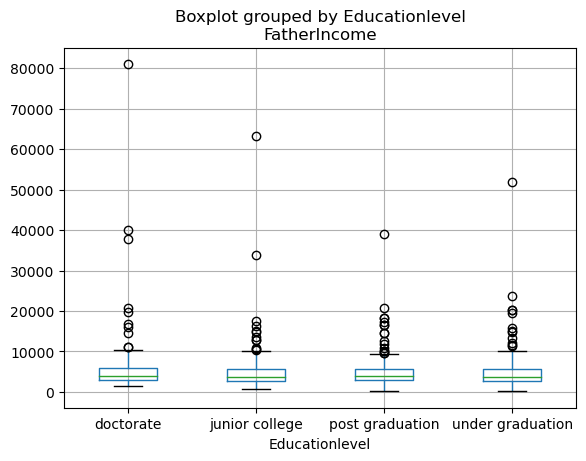

In [36]:
print(train.boxplot(column="FatherIncome",by="Educationlevel" ))

AxesSubplot(0.1,0.15;0.8x0.75)


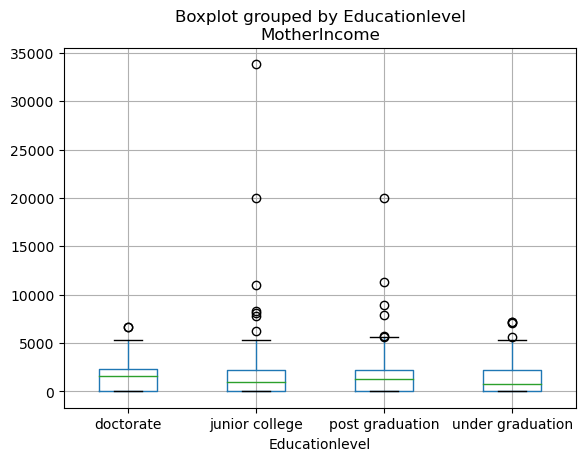

In [37]:
print(train.boxplot(column="MotherIncome",by="Educationlevel" ))

AxesSubplot(0.1,0.15;0.8x0.75)


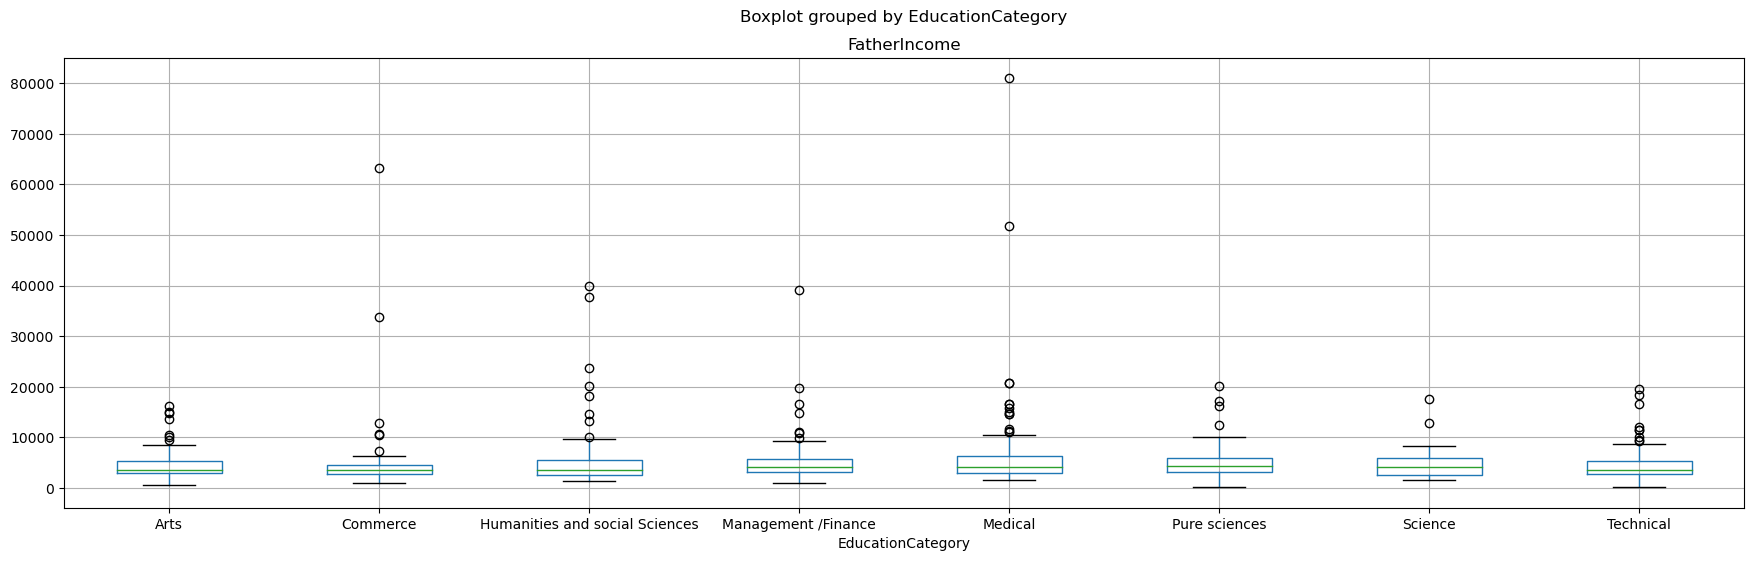

In [38]:
print(train.boxplot(column="FatherIncome",by="EducationCategory",figsize=(21,6) ))  # we plot a boxplot of income by education category

AxesSubplot(0.1,0.15;0.8x0.75)


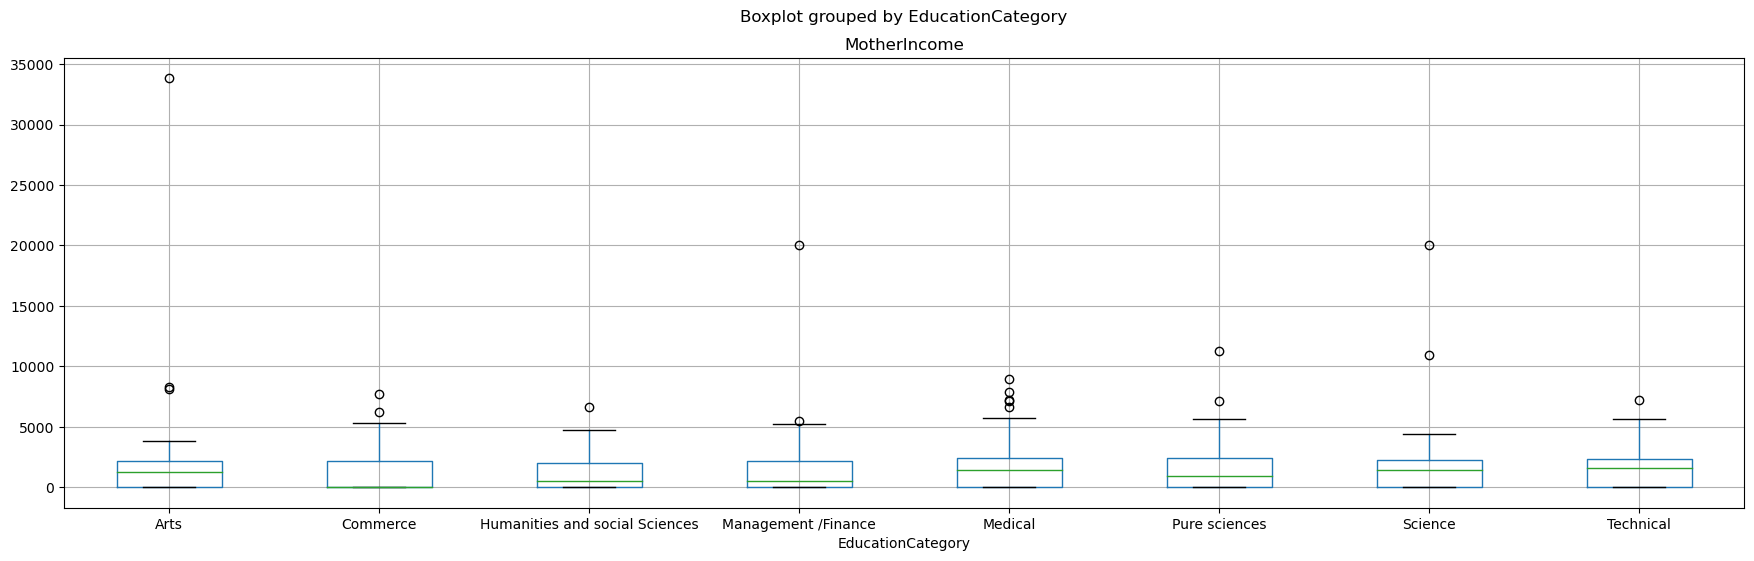

In [39]:
print(train.boxplot(column="MotherIncome",by="EducationCategory",figsize=(21,6) ))

# HeatMaps

<AxesSubplot:>

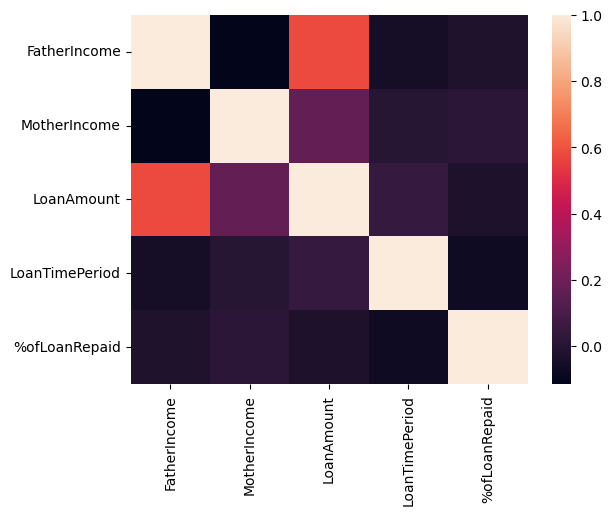

In [40]:
sns.heatmap(train.corr())

Here, we can see that Loan Amount and father income are highly co-related and then mother income and loan amount are also co-related.This shows that Loan amount depends on the income of the family .


Now, we create new columns of log --as the plots of numerical variables are right skewed ,So in order to normalize those graphs we will plot the logvalue of those numerical data columns

<AxesSubplot:xlabel='LoanRepaymentStatus', ylabel='Gender'>

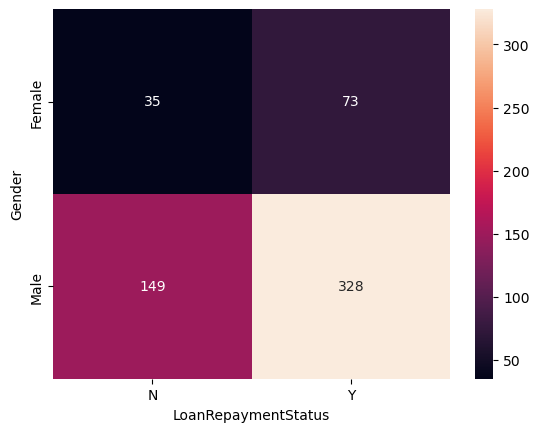

In [41]:

# Group the dataset by Gender and LoanRepaymentStatus and then unstack them
group = train.groupby(['Gender' ,'LoanRepaymentStatus'])
gender_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(gender_survived, annot = True, fmt ="d")

Percentage of male repaying the loans is more than that of females.

<AxesSubplot:xlabel='LoanRepaymentStatus', ylabel='State'>

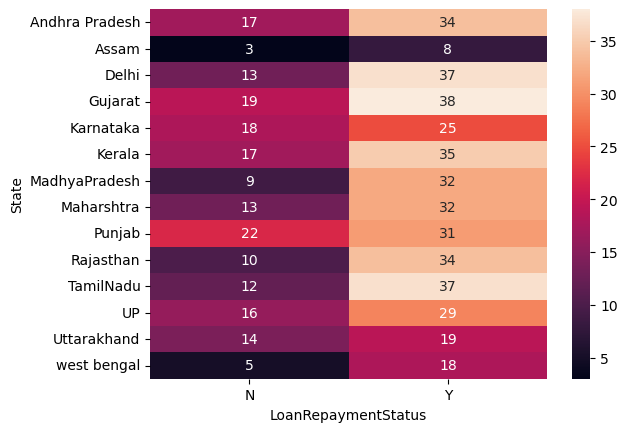

In [42]:
# Group the dataset by State and LoanRepaymentStatus and then unstack them
group1= train.groupby(['State' ,'LoanRepaymentStatus'])
State_survived = group1.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(State_survived, annot = True, fmt ="d")

People from Gujarat, Delhi and TamilNadu repay the loans the most.

<AxesSubplot:xlabel='LoanRepaymentStatus', ylabel='Region'>

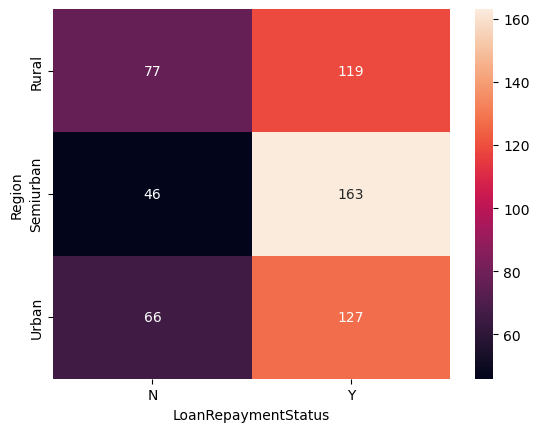

In [43]:
# Group the dataset by Region and LoanRepaymentStatus and then unstack them
group2= train.groupby(['Region' ,'LoanRepaymentStatus'])
Region_survived = group2.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(Region_survived, annot = True, fmt ="d")

People from SemiUrban region repay the loan the most.

<AxesSubplot:xlabel='LoanRepaymentStatus', ylabel='Bank'>

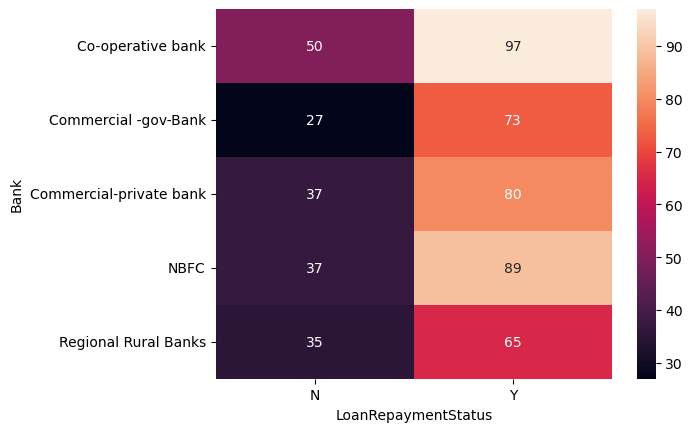

In [44]:
# Group the dataset by Bank and LoanRepaymentStatus and then unstack them
group3= train.groupby(['Bank' ,'LoanRepaymentStatus'])
Bank_survived = group3.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(Bank_survived, annot = True, fmt ="d")

People who take loan from Co-operative banks repay the loan the most.

<AxesSubplot:xlabel='LoanRepaymentStatus', ylabel='EducationCategory'>

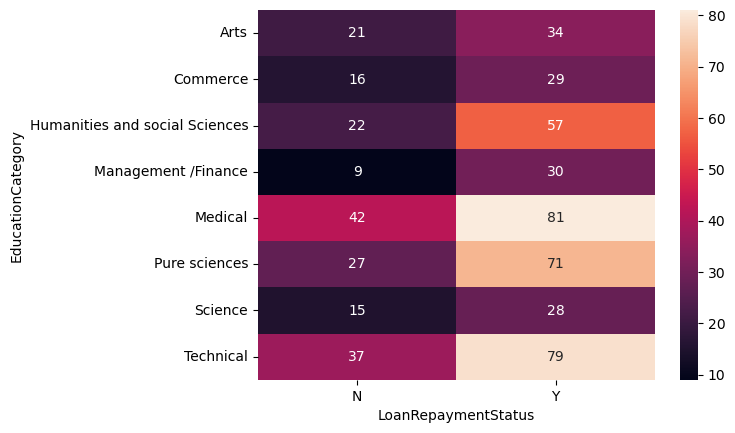

In [45]:
# Group the dataset by EducationCategory and LoanRepaymentStatus and then unstack them
group4= train.groupby(['EducationCategory' ,'LoanRepaymentStatus'])
EducationCategory_survived = group4.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(EducationCategory_survived, annot = True, fmt ="d")

Students pursuing medical repay the loan the most

<AxesSubplot:xlabel='LoanRepaymentStatus', ylabel='Educationlevel'>

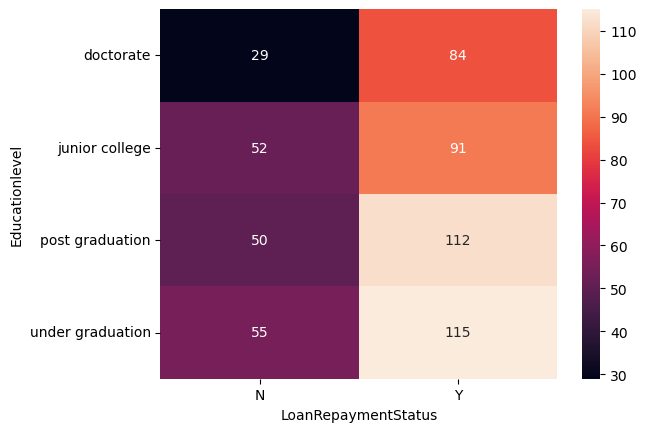

In [46]:
# Group the dataset by Educationlevel and LoanRepaymentStatus and then unstack them
group5= train.groupby(['Educationlevel' ,'LoanRepaymentStatus'])
Educationlevel_survived = group5.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(Educationlevel_survived, annot = True, fmt ="d")

Students pursuing undergraduate courses repay the loan the most

<AxesSubplot:xlabel='LoanRepaymentStatus', ylabel='PrivateOrGovColleges'>

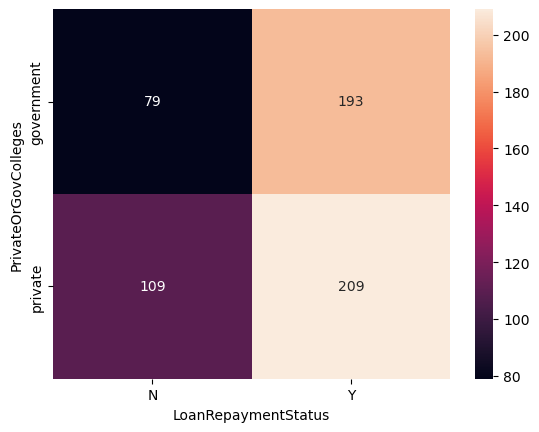

In [47]:
# Group the dataset by PrivateOrGovColleges and LoanRepaymentStatus and then unstack them
group5= train.groupby(['PrivateOrGovColleges' ,'LoanRepaymentStatus'])
PrivateOrGovColleges_survived = group5.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(PrivateOrGovColleges_survived, annot = True, fmt ="d")

Students pursuing education from private colleges repay the loan the most

<AxesSubplot:xlabel='LoanRepaymentStatus', ylabel='RepaidByOwnOrByParents'>

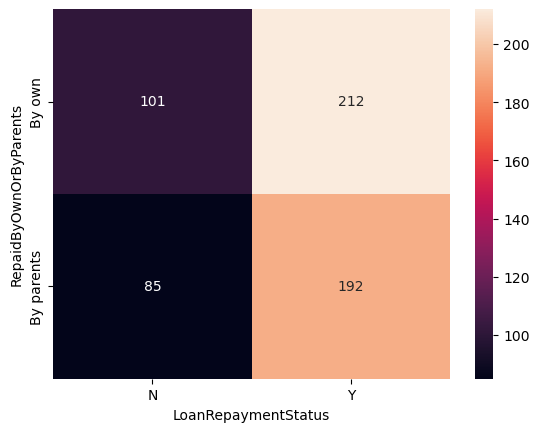

In [48]:
# Group the dataset by RepaidByOwnOrByParents and LoanRepaymentStatus and then unstack them
group6= train.groupby(['RepaidByOwnOrByParents' ,'LoanRepaymentStatus'])
RepaidByOwnOrByParents_survived = group6.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(RepaidByOwnOrByParents_survived, annot = True, fmt ="d")

Mostly students repay the loan on their own.

<AxesSubplot:xlabel='LoanRepaymentStatus', ylabel='EWS'>

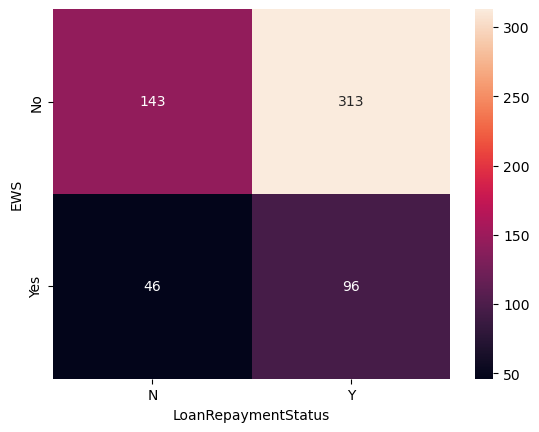

In [49]:
# Group the dataset by RepaidByOwnOrByParents and LoanRepaymentStatus and then unstack them
group6= train.groupby(['EWS' ,'LoanRepaymentStatus'])
RepaidByOwnOrByParents_survived = group6.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(RepaidByOwnOrByParents_survived, annot = True, fmt ="d")

Students who are not EWS mostly repay the loan.

In [50]:
train['TotalIncome']=train["FatherIncome"]+train["MotherIncome"]
#feature engineering --> creating new appropiate features which affect the target variable

In [51]:
train.describe()

,FatherIncome,MotherIncome,LoanAmount,LoanTimePeriod,%ofLoanRepaid,TotalIncome
count,598.000000,598.000000,577.000000,584.000000,595.000000,598.000000
mean,5413.091973,1566.528294,145.374350,342.431507,88.042017,6979.620268
std,6171.529241,2457.840290,84.657594,64.919891,19.522669,6374.645958
min,150.000000,0.000000,9.000000,12.000000,30.000000,1442.000000
25%,2873.500000,0.000000,100.000000,360.000000,75.000000,4161.500000
50%,3806.000000,1211.500000,126.000000,360.000000,100.000000,5359.500000
75%,5786.500000,2281.000000,165.000000,360.000000,100.000000,7452.500000
max,81000.000000,33837.000000,700.000000,480.000000,100.000000,81000.000000


<AxesSubplot:xlabel='Gender', ylabel='TotalIncome'>

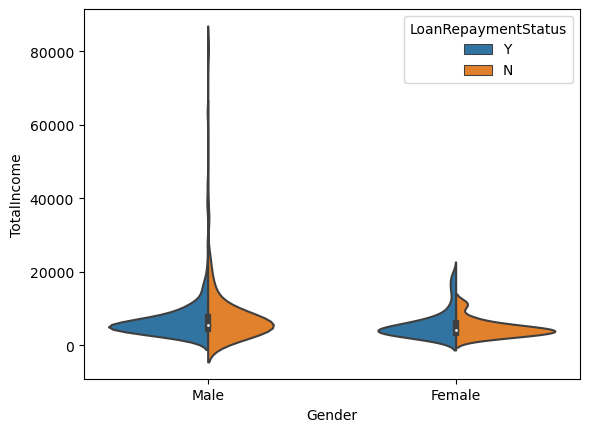

In [52]:
sns.set_color_codes(palette='dark')
sns.violinplot(x ="Gender", y ="TotalIncome", hue ="LoanRepaymentStatus",
data = train, split = True)

In [53]:
train["Father's Income_log"]=np.log(train["FatherIncome"])

In [54]:
train["Total loan amount_log"]=np.log(train["LoanAmount"])

In [55]:
train["% of loan repaid in the decided time period_log"]=np.log(train["%ofLoanRepaid"])

In [56]:
train["Loan time period_log"]=np.log(train["LoanTimePeriod"])

Normalizing the histograms

AxesSubplot(0.125,0.11;0.775x0.77)


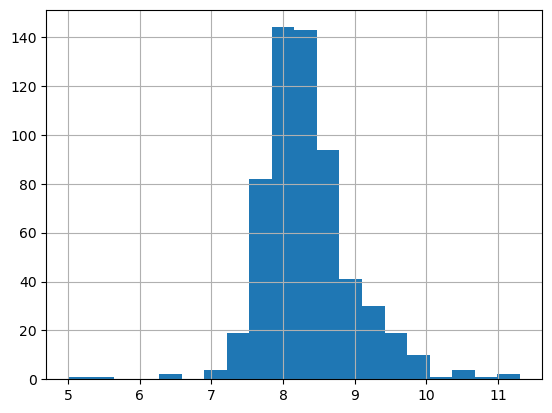

In [57]:
print(train["Father's Income_log"].hist(bins=20))

AxesSubplot(0.125,0.11;0.775x0.77)


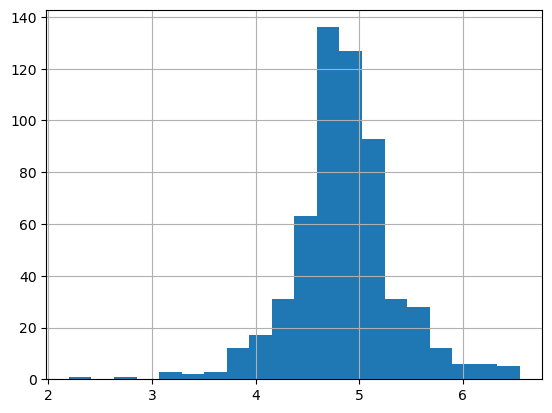

In [58]:
print(train["Total loan amount_log"].hist(bins=20))  # to normalize the histograms we calculate the log of the feature and then plot the histogram of it instead of plotting the histogram of
                                                    #feature itself


<AxesSubplot:xlabel='Total loan amount_log', ylabel='Density'>

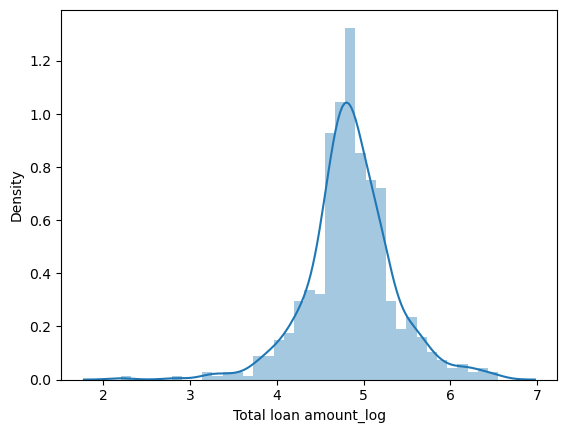

In [59]:
sns.distplot(train['Total loan amount_log'])

AxesSubplot(0.125,0.11;0.775x0.77)


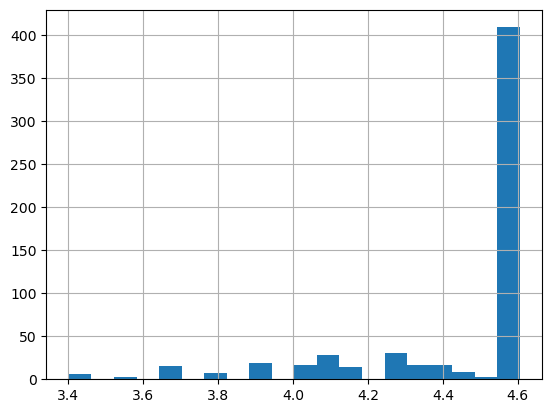

In [60]:
print(train["% of loan repaid in the decided time period_log"].hist(bins=20))

AxesSubplot(0.125,0.11;0.775x0.77)


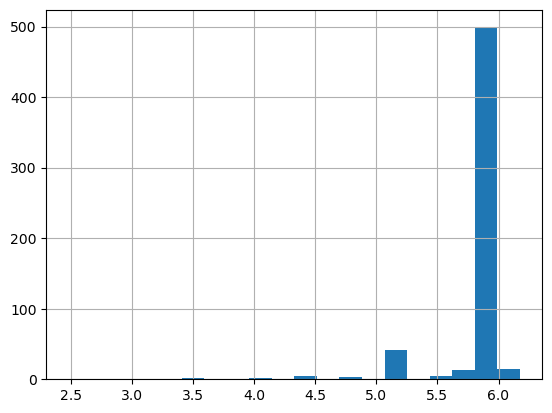

In [61]:
print(train["Loan time period_log"].hist(bins=20))

LoanRepaymentStatus    N    Y
Gender                       
Female                35   73
Male                 149  328


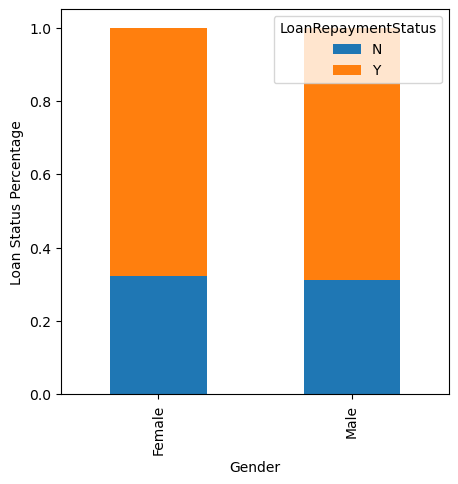

In [62]:
print(pd.crosstab(train["Gender"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["Gender"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Gender")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus   N   Y
State                      
Andhra Pradesh       17  34
Assam                 3   8
Delhi                13  37
Gujarat              19  38
Karnataka            18  25
Kerala               17  35
MadhyaPradesh         9  32
Maharshtra           13  32
Punjab               22  31
Rajasthan            10  34
TamilNadu            12  37
UP                   16  29
Uttarakhand          14  19
west bengal           5  18


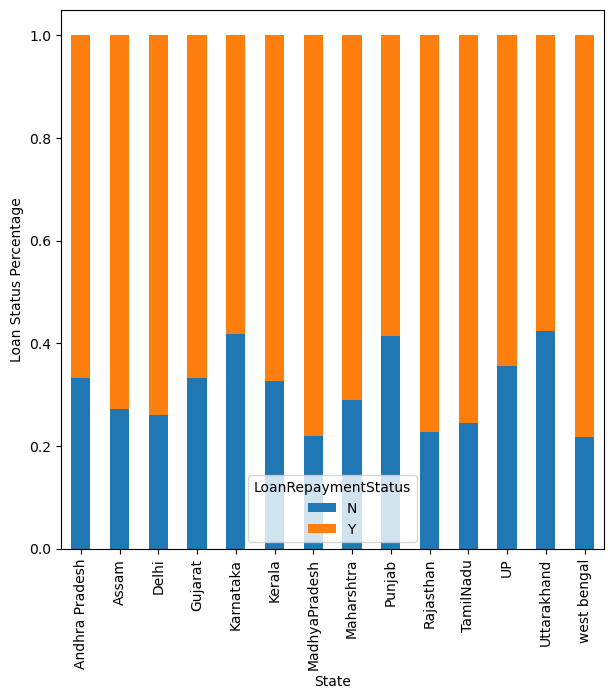

In [63]:
print(pd.crosstab(train["State"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["State"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.xlabel("State")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus   N    Y
Region                      
Rural                77  119
Semiurban            46  163
Urban                66  127


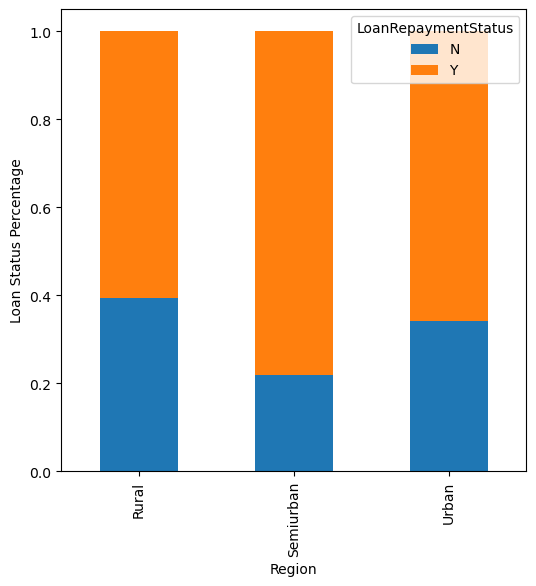

In [64]:
print(pd.crosstab(train["Region"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["Region"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("Region")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus       N   Y
Bank                           
Co-operative bank        50  97
Commercial -gov-Bank     27  73
Commercial-private bank  37  80
NBFC                     37  89
Regional Rural Banks     35  65


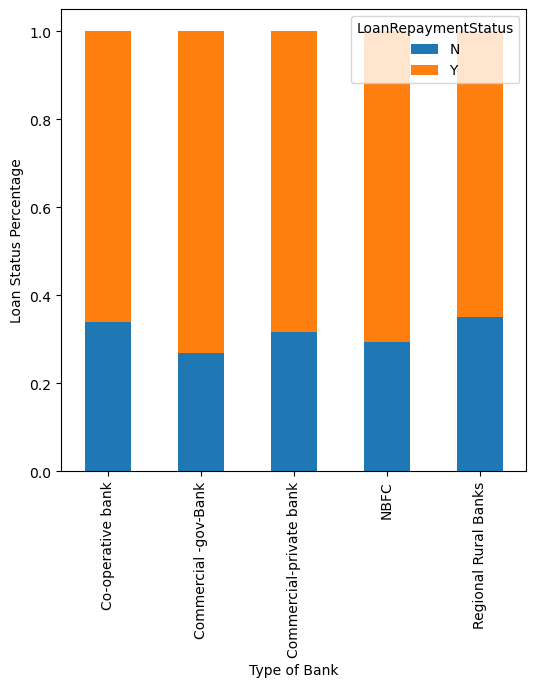

In [65]:
print(pd.crosstab(train["Bank"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["Bank"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("Type of Bank")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus   N    Y
Educationlevel              
doctorate            29   84
junior college       52   91
post graduation      50  112
under graduation     55  115


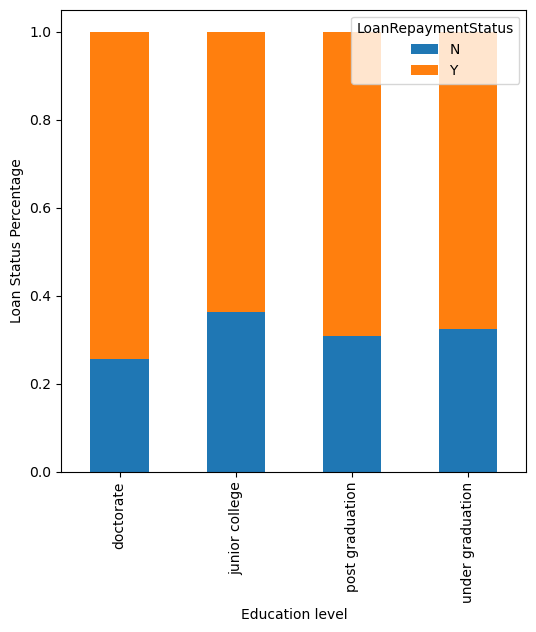

In [66]:
print(pd.crosstab(train["Educationlevel"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["Educationlevel"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("Education level")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus              N   Y
EducationCategory                     
Arts                            21  34
Commerce                        16  29
Humanities and social Sciences  22  57
Management /Finance              9  30
Medical                         42  81
Pure sciences                   27  71
Science                         15  28
Technical                       37  79


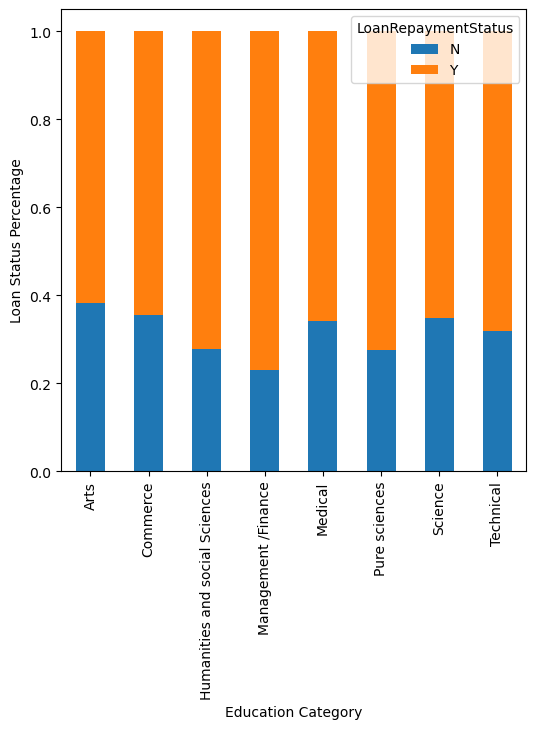

In [67]:
print(pd.crosstab(train["EducationCategory"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["EducationCategory"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("Education Category")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus     N    Y
PrivateOrGovColleges          
government             79  193
private               109  209


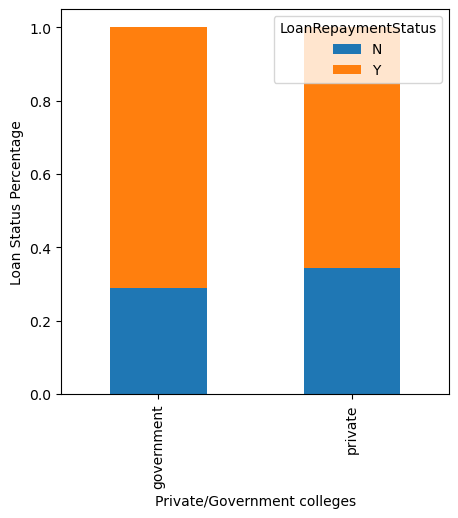

In [68]:
print(pd.crosstab(train["PrivateOrGovColleges"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["PrivateOrGovColleges"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Private/Government colleges")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus       N    Y
RepaidByOwnOrByParents          
By own                  101  212
By parents               85  192


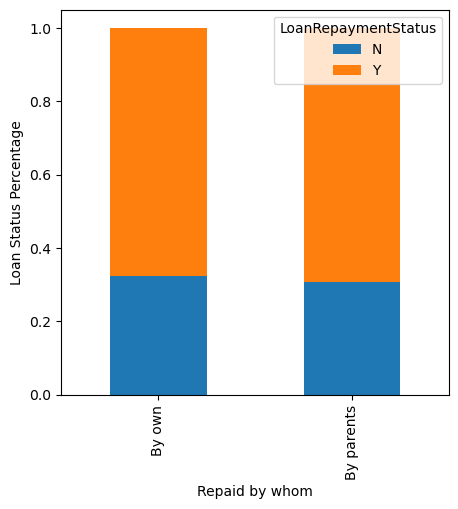

In [69]:
print(pd.crosstab(train["RepaidByOwnOrByParents"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["RepaidByOwnOrByParents"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Repaid by whom")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus      N    Y
SecuredOrUnsecuredLoan         
Secured                 93  196
Unsecured               93  208


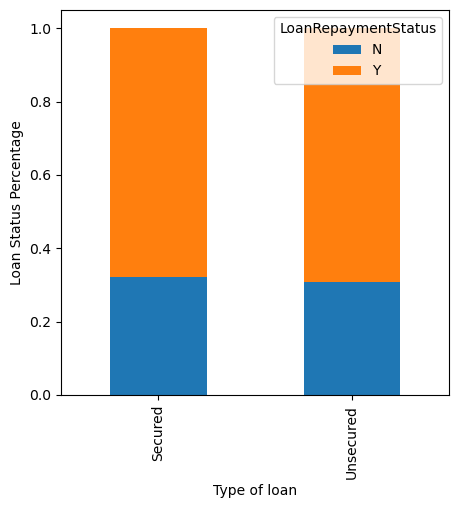

In [70]:
print(pd.crosstab(train["SecuredOrUnsecuredLoan"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["SecuredOrUnsecuredLoan"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Type of loan")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus    N    Y
Employed                     
No                   156  332
Yes                   25   55


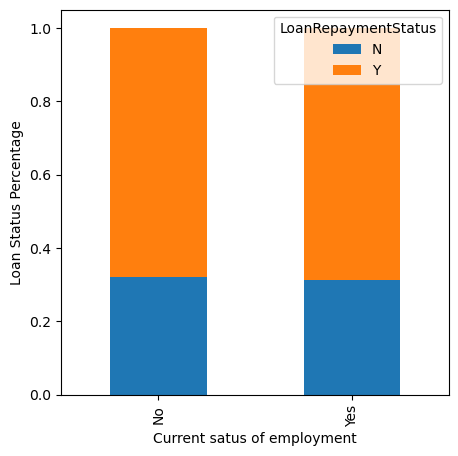

In [71]:
print(pd.crosstab(train["Employed"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["Employed"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Current satus of employment")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus    N    Y
EWS                          
No                   143  313
Yes                   46   96


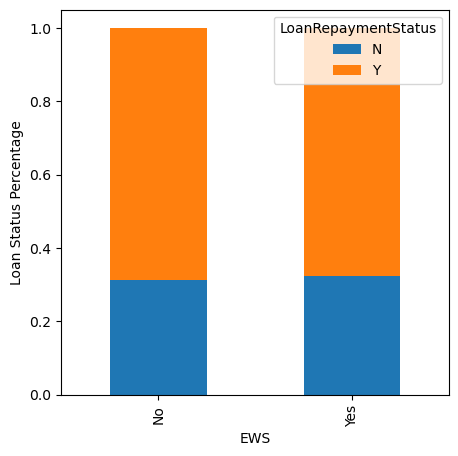

In [72]:
print(pd.crosstab(train["EWS"],train["LoanRepaymentStatus"]))
Gender = pd.crosstab(train["EWS"],train["LoanRepaymentStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("EWS")
plt.ylabel("Loan Status Percentage")
plt.show()

# Data analysis

In [73]:
train.isnull().sum() # this gives the total count of missing values for all features 
##if any feature has many null entries , we can drop it as it increases noise


Name                                                0
Gender                                             13
State                                               1
Region                                              0
FatherIncome                                        0
MotherIncome                                        0
Bank                                                8
EducationCategory                                   0
Educationlevel                                     10
PrivateOrGovColleges                                8
LoanAmount                                         21
LoanTimePeriod                                     14
RepaidByOwnOrByParents                              8
SecuredOrUnsecuredLoan                              8
LoanRepaymentStatus                                 0
%ofLoanRepaid                                       3
Employed                                           30
EWS                                                 0
TotalIncome                 

In [74]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True) #filling missing values by mode 


In [75]:
train["State"].fillna(train["State"].mode()[0],inplace=True)

In [76]:
train["Bank"].fillna(train["Bank"].mode()[0],inplace=True)

In [77]:
train["Educationlevel"].fillna(train["Educationlevel"].mode()[0],inplace=True)

In [78]:
train["PrivateOrGovColleges"].fillna(train["PrivateOrGovColleges"].mode()[0],inplace=True)

In [79]:
train["RepaidByOwnOrByParents"].fillna(train["RepaidByOwnOrByParents"].mode()[0],inplace=True)

In [80]:
train["SecuredOrUnsecuredLoan"].fillna(train["SecuredOrUnsecuredLoan"].mode()[0],inplace=True)

In [81]:
train["Employed"].fillna(train["Employed"].mode()[0],inplace=True)

In [82]:
train.isnull().sum()

Name                                                0
Gender                                              0
State                                               0
Region                                              0
FatherIncome                                        0
MotherIncome                                        0
Bank                                                0
EducationCategory                                   0
Educationlevel                                      0
PrivateOrGovColleges                                0
LoanAmount                                         21
LoanTimePeriod                                     14
RepaidByOwnOrByParents                              0
SecuredOrUnsecuredLoan                              0
LoanRepaymentStatus                                 0
%ofLoanRepaid                                       3
Employed                                            0
EWS                                                 0
TotalIncome                 

In [83]:
train["LoanAmount"].fillna(train["LoanAmount"].mean(),inplace=True)

In [84]:
train["LoanTimePeriod"].fillna(train["LoanTimePeriod"].median(),inplace=True) 
#We will use median instead of mean to fill the null values if there are many outliers in the feature variable
 

In [85]:
train["%ofLoanRepaid"].fillna(train["%ofLoanRepaid"].median(),inplace=True)

In [86]:
train.isnull().sum()

Name                                                0
Gender                                              0
State                                               0
Region                                              0
FatherIncome                                        0
MotherIncome                                        0
Bank                                                0
EducationCategory                                   0
Educationlevel                                      0
PrivateOrGovColleges                                0
LoanAmount                                          0
LoanTimePeriod                                      0
RepaidByOwnOrByParents                              0
SecuredOrUnsecuredLoan                              0
LoanRepaymentStatus                                 0
%ofLoanRepaid                                       0
Employed                                            0
EWS                                                 0
TotalIncome                 

In [87]:
train['TotalIncome'].head(5)

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: TotalIncome, dtype: float64

In [88]:

train = train.drop(["Name","FatherIncome","MotherIncome","Father's Income_log","Total loan amount_log","Loan time period_log","% of loan repaid in the decided time period_log"],axis=1) 
#Dropping the not required feature variables

In [89]:
train.head(5)

,Gender,State,Region,Bank,EducationCategory,Educationlevel,PrivateOrGovColleges,LoanAmount,LoanTimePeriod,RepaidByOwnOrByParents,SecuredOrUnsecuredLoan,LoanRepaymentStatus,%ofLoanRepaid,Employed,EWS,TotalIncome
0,Male,west bengal,Urban,Commercial-private bank,Arts,junior college,private,145.37435,360.0,By parents,Unsecured,Y,100.0,No,No,5849.0
1,Male,MadhyaPradesh,Rural,Co-operative bank,Management /Finance,under graduation,private,128.00000,360.0,By own,Secured,N,50.0,No,No,6091.0
2,Male,MadhyaPradesh,Urban,NBFC,Technical,post graduation,government,66.00000,360.0,By parents,Secured,Y,100.0,Yes,Yes,3000.0
3,Male,Assam,Urban,Commercial -gov-Bank,Medical,doctorate,private,120.00000,360.0,By own,Unsecured,Y,100.0,No,No,4941.0
4,Male,Uttarakhand,Rural,Regional Rural Banks,Pure sciences,post graduation,government,141.00000,360.0,By parents,Unsecured,Y,100.0,No,No,6000.0


In [90]:
df_model = train.copy()

# Label Encoding

In [91]:
from sklearn.preprocessing import LabelEncoder


In [92]:
label_encoder=LabelEncoder()

In [93]:
train["State"]=label_encoder.fit_transform(train["State"])
#we will use labelEncoding here as there are many possible values for state

In [94]:
train["EducationCategory"]=label_encoder.fit_transform(train["EducationCategory"])

In [95]:
train["Bank"]=label_encoder.fit_transform(train["Bank"])

In [96]:
train["Region"]=label_encoder.fit_transform(train["Region"])
#train.Region=train.Region.map({'Rural':0,'Semiurban':1,'Urban':2})

In [97]:
 train["Employed"]=label_encoder.fit_transform(train["Employed"])
#train.Employed=train.Employed.map({'No':0,'Yes':1})

In [98]:
train["PrivateOrGovColleges"]=label_encoder.fit_transform(train["PrivateOrGovColleges"])

In [99]:
train["Gender"]=label_encoder.fit_transform(train["Gender"])

In [100]:
train["EWS"]=label_encoder.fit_transform(train["EWS"])

In [101]:
train["RepaidByOwnOrByParents"]=label_encoder.fit_transform(train["RepaidByOwnOrByParents"])

In [102]:
train["SecuredOrUnsecuredLoan"]=label_encoder.fit_transform(train["SecuredOrUnsecuredLoan"])

In [103]:
train["Educationlevel"]=label_encoder.fit_transform(train["Educationlevel"])
#train.Educationlevel=train.Educationlevel.map({'junior college':0,'under graduation':1,'post graduation':2,'doctorate':3})

In [104]:
train["LoanRepaymentStatus"]=label_encoder.fit_transform(train["LoanRepaymentStatus"])
#train.Loan-repayment_status=train.Loan-repayment_status.map({'Y':1,'N':0})

In [105]:

train.sample(10)

,Gender,State,Region,Bank,EducationCategory,Educationlevel,PrivateOrGovColleges,LoanAmount,LoanTimePeriod,RepaidByOwnOrByParents,SecuredOrUnsecuredLoan,LoanRepaymentStatus,%ofLoanRepaid,Employed,EWS,TotalIncome
341,0,6,0,0,7,2,1,46.0,360.0,0,1,0,75.0,0,1,2378.0
85,1,11,1,0,2,3,0,136.0,360.0,0,1,1,100.0,0,0,4897.0
313,1,8,0,3,7,3,1,144.0,84.0,0,0,1,100.0,1,0,5746.0
61,1,6,2,2,7,2,1,99.0,360.0,1,1,1,100.0,0,1,3029.0
447,1,3,0,0,7,3,1,55.0,360.0,1,1,0,70.0,0,0,4915.0
355,0,10,2,1,7,0,0,116.0,180.0,0,0,1,100.0,0,1,3813.0
335,1,3,1,0,4,3,0,70.0,360.0,0,1,1,100.0,1,0,9993.0
237,0,8,2,0,6,1,1,122.0,360.0,0,1,1,100.0,1,1,3463.0
84,1,6,2,2,1,1,1,50.0,240.0,0,0,1,100.0,0,1,3988.0
378,1,4,0,4,5,3,0,71.0,480.0,1,0,0,35.0,0,1,3069.0


In [106]:
df_model.head(5)

,Gender,State,Region,Bank,EducationCategory,Educationlevel,PrivateOrGovColleges,LoanAmount,LoanTimePeriod,RepaidByOwnOrByParents,SecuredOrUnsecuredLoan,LoanRepaymentStatus,%ofLoanRepaid,Employed,EWS,TotalIncome
0,Male,west bengal,Urban,Commercial-private bank,Arts,junior college,private,145.37435,360.0,By parents,Unsecured,Y,100.0,No,No,5849.0
1,Male,MadhyaPradesh,Rural,Co-operative bank,Management /Finance,under graduation,private,128.00000,360.0,By own,Secured,N,50.0,No,No,6091.0
2,Male,MadhyaPradesh,Urban,NBFC,Technical,post graduation,government,66.00000,360.0,By parents,Secured,Y,100.0,Yes,Yes,3000.0
3,Male,Assam,Urban,Commercial -gov-Bank,Medical,doctorate,private,120.00000,360.0,By own,Unsecured,Y,100.0,No,No,4941.0
4,Male,Uttarakhand,Rural,Regional Rural Banks,Pure sciences,post graduation,government,141.00000,360.0,By parents,Unsecured,Y,100.0,No,No,6000.0


In [107]:
# #We use one-hot encoding when our data contain categorical features whose possible values cannot be ordered.
# #For example, in gender column, we can’t order male and female as female > male or male > female as that would bias algorithms.

gender_train = pd.get_dummies(df_model.Gender)
gender_train.columns = ['Gender_female','Gender_male']
gender_train.describe()

,Gender_female,Gender_male
count,598.000000,598.000000
mean,0.180602,0.819398
std,0.385010,0.385010
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [108]:
gender_train.head(20)

,Gender_female,Gender_male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [109]:
EWS_train = pd.get_dummies(df_model.EWS)
EWS_train.columns = ['EWS_no','EWS_yes']
EWS_train.describe()

,EWS_no,EWS_yes
count,598.000000,598.000000
mean,0.762542,0.237458
std,0.425882,0.425882
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [110]:
EWS_train

,EWS_no,EWS_yes
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
593,1,0
594,1,0
595,0,1
596,1,0


In [111]:
Region_train = pd.get_dummies(df_model.Region)
Region_train.columns = ['Region_Rural','Region_Semiurban','Region_Urban']
Region_train.describe()

,Region_Rural,Region_Semiurban,Region_Urban
count,598.000000,598.000000,598.000000
mean,0.327759,0.349498,0.322742
std,0.469789,0.477211,0.467917
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [112]:
Region_train

,Region_Rural,Region_Semiurban,Region_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
593,1,0,0
594,0,0,1
595,1,0,0
596,1,0,0


In [113]:
Educationlevel_train = pd.get_dummies(df_model.Educationlevel)
Educationlevel_train.columns = ['Junior college','Undergraduate','PostGraduate','Doctorate']
Educationlevel_train.describe()

,Junior college,Undergraduate,PostGraduate,Doctorate
count,598.000000,598.00000,598.000000,598.000000
mean,0.188963,0.23913,0.270903,0.301003
std,0.391807,0.42691,0.444798,0.459078
min,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000


In [114]:
Educationlevel_train

,Junior college,Undergraduate,PostGraduate,Doctorate
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
593,0,0,0,1
594,1,0,0,0
595,0,1,0,0
596,1,0,0,0


In [115]:
EducationCategory_train = pd.get_dummies(df_model.EducationCategory)
EducationCategory_train.columns = ['Arts','commerce','Humanities and social Sciences','Management/Finance','Medical','Pure sciences','science','Technical']
EducationCategory_train.describe()


,Arts,commerce,Humanities and social Sciences,Management/Finance,Medical,Pure sciences,science,Technical
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.091973,0.075251,0.132107,0.065217,0.205686,0.163880,0.071906,0.193980
std,0.289230,0.264016,0.338891,0.247116,0.404540,0.370476,0.258549,0.395744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
EducationCategory_train

,Arts,commerce,Humanities and social Sciences,Management/Finance,Medical,Pure sciences,science,Technical
0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
593,0,0,0,0,0,0,0,1
594,0,0,0,0,0,1,0,0
595,0,1,0,0,0,0,0,0
596,0,0,0,0,1,0,0,0


In [117]:
Bank_train = pd.get_dummies(df_model.Bank)
Bank_train.columns = ['Co-operative','Commercial-gov','Commercial-private','NBFC','Regional Rural']
Bank_train.describe()

,Co-operative,Commercial-gov,Commercial-private,NBFC,Regional Rural
count,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.259197,0.167224,0.195652,0.210702,0.167224
std,0.438561,0.373488,0.397034,0.408149,0.373488
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
Bank_train

,Co-operative,Commercial-gov,Commercial-private,NBFC,Regional Rural
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
593,0,0,1,0,0
594,1,0,0,0,0
595,0,0,0,0,1
596,0,0,0,1,0


In [119]:
Privategov_train = pd.get_dummies(df_model.PrivateOrGovColleges)
Privategov_train.columns = ['government','private']
Privategov_train.describe()

,government,private
count,598.000000,598.000000
mean,0.454849,0.545151
std,0.498374,0.498374
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [120]:
Privategov_train

,government,private
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
593,0,1
594,1,0
595,1,0
596,0,1


In [121]:
RepaidByOwnOrByParents_train = pd.get_dummies(df_model.RepaidByOwnOrByParents)
RepaidByOwnOrByParents_train.columns = ['By-own','By-parents']
RepaidByOwnOrByParents_train.describe()

,By-own,By-parents
count,598.000000,598.000000
mean,0.536789,0.463211
std,0.499062,0.499062
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [122]:
RepaidByOwnOrByParents_train

,By-own,By-parents
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
593,1,0
594,1,0
595,0,1
596,0,1


In [123]:
SecuredOrUnsecuredLoan_train = pd.get_dummies(df_model.SecuredOrUnsecuredLoan)
SecuredOrUnsecuredLoan_train.columns = ['Secured','Unsecured']
SecuredOrUnsecuredLoan_train.describe()

,Secured,Unsecured
count,598.000000,598.000000
mean,0.483278,0.516722
std,0.500139,0.500139
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [124]:
SecuredOrUnsecuredLoan_train

,Secured,Unsecured
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
593,1,0
594,0,1
595,1,0
596,1,0


In [125]:
Employed_train = pd.get_dummies(df_model.Employed)
Employed_train.columns = ['No','yes']
Employed_train.describe()

,No,yes
count,598.000000,598.000000
mean,0.866221,0.133779
std,0.340700,0.340700
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [126]:
Employed_train

,No,yes
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
593,1,0
594,0,1
595,1,0
596,0,1


In [127]:
df_model["State"]=label_encoder.fit_transform(df_model["State"])

In [128]:
df_model["LoanRepaymentStatus"]=label_encoder.fit_transform(df_model["LoanRepaymentStatus"])

In [129]:
df_model = pd.concat([df_model,gender_train], axis = 1)

In [130]:
df_model = pd.concat([df_model,EWS_train], axis = 1)

In [131]:
df_model = pd.concat([df_model,Region_train], axis = 1)

In [132]:
df_model = pd.concat([df_model,Employed_train], axis = 1)

In [133]:
df_model = pd.concat([df_model,SecuredOrUnsecuredLoan_train], axis = 1)

In [134]:
df_model = pd.concat([df_model,RepaidByOwnOrByParents_train], axis = 1)

In [135]:
df_model = pd.concat([df_model,Privategov_train], axis = 1)

In [136]:
df_model = pd.concat([df_model,Educationlevel_train], axis = 1)

In [137]:
df_model = pd.concat([df_model,EducationCategory_train], axis = 1)

In [138]:
df_model = df_model.drop(['Gender','Region','Employed','EWS','SecuredOrUnsecuredLoan','RepaidByOwnOrByParents','Educationlevel','EducationCategory','PrivateOrGovColleges','Bank'],axis=1) 

In [139]:
df_model.head(5)

,State,LoanAmount,LoanTimePeriod,LoanRepaymentStatus,%ofLoanRepaid,TotalIncome,Gender_female,Gender_male,EWS_no,EWS_yes,...,PostGraduate,Doctorate,Arts,commerce,Humanities and social Sciences,Management/Finance,Medical,Pure sciences,science,Technical
0,13,145.37435,360.0,1,100.0,5849.0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,6,128.00000,360.0,0,50.0,6091.0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
2,6,66.00000,360.0,1,100.0,3000.0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,120.00000,360.0,1,100.0,4941.0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,12,141.00000,360.0,1,100.0,6000.0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


# Binning

In [140]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [141]:
kbin_TotalIncome = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_LoanAmount = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_LoanTimePeriod = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='kmeans')


In [142]:
col_name = "TotalIncome"
col_name1 = "LoanAmount"
col_name2 = "LoanTimePeriod"

  
# find the index no
index_no = train.columns.get_loc(col_name)
index_no1 = train.columns.get_loc(col_name1)
index_no2 = train.columns.get_loc(col_name2)

print(index_no)
print(index_no1)
print(index_no2)


15
7
8


In [143]:
trf = ColumnTransformer([
    ('first',kbin_TotalIncome,[15]),
    ('second',kbin_LoanAmount,[7]),
     ('third',kbin_LoanTimePeriod,[8])
])


In [144]:
train_trf=trf.fit_transform(train)

In [145]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1442. ,  3241.9,  3789.6,  4371.5,  4764.6,  5359.5,  6035.4,
               6783.9,  8334. , 11413.2, 81000. ])                          ],
      dtype=object)

In [146]:
trf.named_transformers_['second'].bin_edges_

array([array([  9. ,  72.7,  96. , 109. , 117.8, 128. , 139.2, 153.9, 180. ,
              225.9, 700. ])                                                ],
      dtype=object)

In [147]:
trf.named_transformers_['third'].bin_edges_

array([array([ 12.,  24.,  48.,  72., 102., 150., 210., 270., 330., 420., 480.])],
      dtype=object)

In [148]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [149]:
trf.named_transformers_['second']

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [150]:
trf.named_transformers_['third']

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [151]:
output=pd.DataFrame({
    'TotalIncome':train['TotalIncome'],
    'TotalIncome_trf':train_trf[:,0],
    'LoanAmount':train['LoanAmount'],
    'LoanAmount_trf':train_trf[:,1],
     'LoanTimePeriod':train['LoanTimePeriod'],
    'LoanTimePeriod_trf':train_trf[:,2],
    'LoanRepaymentStatus':train['LoanRepaymentStatus'],
})

In [152]:
output['TotalIncome_labels']=pd.cut(x=train['TotalIncome'],
bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['LoanAmount_labels']=pd.cut(x=train['LoanAmount'],
bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
output['LoanTimePeriod_labels']=pd.cut(x=train['LoanTimePeriod'],
bins=trf.named_transformers_['third'].bin_edges_[0].tolist())

In [153]:
output.sample(5)

,TotalIncome,TotalIncome_trf,LoanAmount,LoanAmount_trf,LoanTimePeriod,LoanTimePeriod_trf,LoanRepaymentStatus,TotalIncome_labels,LoanAmount_labels,LoanTimePeriod_labels
127,5505.0,5.0,145.37435,6.0,360.0,8.0,1,"(5359.5, 6035.4]","(139.2, 153.9]","(330.0, 420.0]"
439,7142.0,7.0,138.00000,5.0,360.0,8.0,1,"(6783.9, 8334.0]","(128.0, 139.2]","(330.0, 420.0]"
288,4124.0,2.0,115.00000,3.0,360.0,8.0,1,"(3789.6, 4371.5]","(109.0, 117.8]","(330.0, 420.0]"
538,3453.0,1.0,66.00000,0.0,360.0,8.0,0,"(3241.9, 3789.6]","(9.0, 72.7]","(330.0, 420.0]"
534,18165.0,9.0,125.00000,4.0,360.0,8.0,1,"(11413.2, 81000.0]","(117.8, 128.0]","(330.0, 420.0]"


LoanRepaymentStatus   0   1
TotalIncome_labels         
(1442.0, 3241.9]     23  36
(3241.9, 3789.6]     19  41
(3789.6, 4371.5]     15  45
(4371.5, 4764.6]     20  39
(4764.6, 5359.5]     18  42
(5359.5, 6035.4]     15  45
(6035.4, 6783.9]     19  40
(6783.9, 8334.0]     21  40
(8334.0, 11413.2]    16  43
(11413.2, 81000.0]   22  38


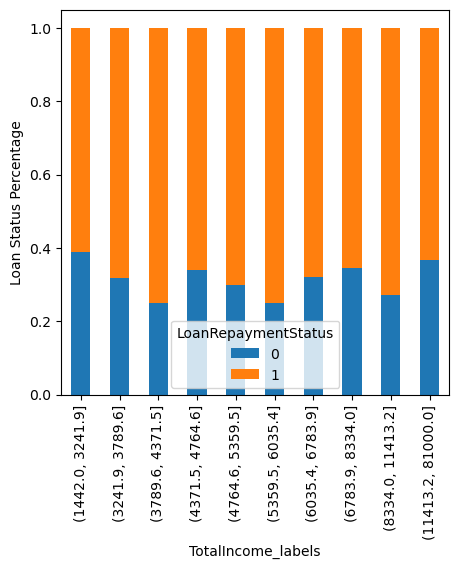

In [154]:
print(pd.crosstab(output["TotalIncome_labels"],output["LoanRepaymentStatus"]))
TotalIncome_labels = pd.crosstab(output["TotalIncome_labels"],output["LoanRepaymentStatus"])
TotalIncome_labels.div(TotalIncome_labels.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("TotalIncome_labels")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus   0   1
LoanAmount_labels          
(9.0, 72.7]          18  41
(72.7, 96.0]         21  46
(96.0, 109.0]        17  37
(109.0, 117.8]       17  41
(117.8, 128.0]       16  47
(128.0, 139.2]       14  43
(139.2, 153.9]       21  38
(153.9, 180.0]       23  41
(180.0, 225.9]       19  37
(225.9, 700.0]       22  38


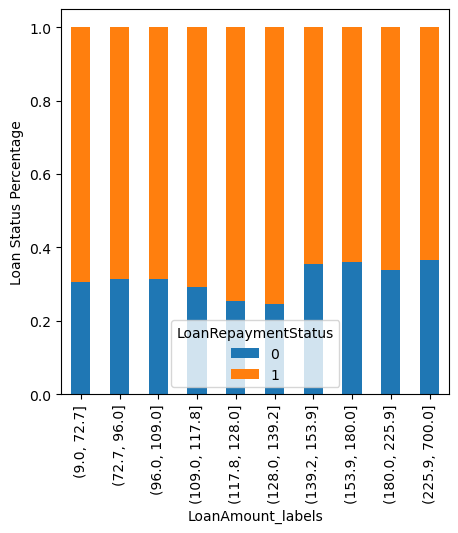

In [155]:
print(pd.crosstab(output["LoanAmount_labels"],output["LoanRepaymentStatus"]))
LoanAmount_labels = pd.crosstab(output["LoanAmount_labels"],output["LoanRepaymentStatus"])
LoanAmount_labels.div(LoanAmount_labels.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("LoanAmount_labels")
plt.ylabel("Loan Status Percentage")
plt.show()

LoanRepaymentStatus      0    1
LoanTimePeriod_labels          
(24.0, 48.0]             2    0
(48.0, 72.0]             0    2
(72.0, 102.0]            1    3
(102.0, 150.0]           0    3
(150.0, 210.0]          13   28
(210.0, 270.0]           1    3
(270.0, 330.0]           5    8
(330.0, 420.0]         158  355
(420.0, 480.0]           9    6


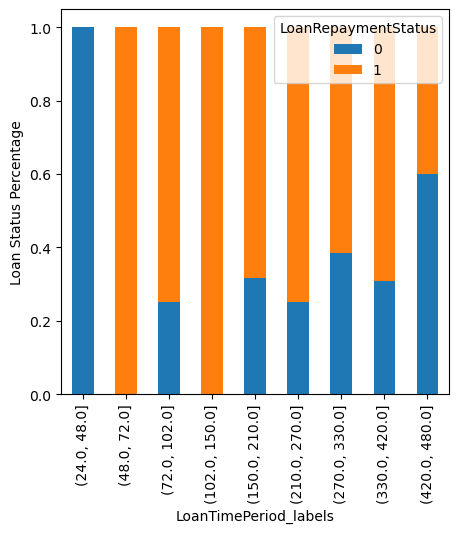

In [156]:
print(pd.crosstab(output["LoanTimePeriod_labels"],output["LoanRepaymentStatus"]))
LoanTimePeriod_labels = pd.crosstab(output["LoanTimePeriod_labels"],output["LoanRepaymentStatus"])
LoanTimePeriod_labels.div(LoanTimePeriod_labels.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("LoanTimePeriod_labels")
plt.ylabel("Loan Status Percentage")
plt.show()

In [157]:
df_model.columns


Index(['State', 'LoanAmount', 'LoanTimePeriod', 'LoanRepaymentStatus',
       '%ofLoanRepaid', 'TotalIncome', 'Gender_female', 'Gender_male',
       'EWS_no', 'EWS_yes', 'Region_Rural', 'Region_Semiurban', 'Region_Urban',
       'No', 'yes', 'Secured', 'Unsecured', 'By-own', 'By-parents',
       'government', 'private', 'Junior college', 'Undergraduate',
       'PostGraduate', 'Doctorate', 'Arts', 'commerce',
       'Humanities and social Sciences', 'Management/Finance', 'Medical',
       'Pure sciences', 'science', 'Technical'],
      dtype='object')

In [158]:
df_model=df_model.drop(['LoanRepaymentStatus'],axis=1) 

In [159]:
extract_col=train['LoanRepaymentStatus']

In [160]:
df_model = pd.concat([df_model,extract_col], axis = 1)

In [161]:
df_model.head()

,State,LoanAmount,LoanTimePeriod,%ofLoanRepaid,TotalIncome,Gender_female,Gender_male,EWS_no,EWS_yes,Region_Rural,...,Doctorate,Arts,commerce,Humanities and social Sciences,Management/Finance,Medical,Pure sciences,science,Technical,LoanRepaymentStatus
0,13,145.37435,360.0,100.0,5849.0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,6,128.00000,360.0,50.0,6091.0,0,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0
2,6,66.00000,360.0,100.0,3000.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,1,120.00000,360.0,100.0,4941.0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,12,141.00000,360.0,100.0,6000.0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [162]:
df_model.count


<bound method DataFrame.count of      State  LoanAmount  LoanTimePeriod  %ofLoanRepaid  TotalIncome  \
0       13   145.37435           360.0          100.0       5849.0   
1        6   128.00000           360.0           50.0       6091.0   
2        6    66.00000           360.0          100.0       3000.0   
3        1   120.00000           360.0          100.0       4941.0   
4       12   141.00000           360.0          100.0       6000.0   
..     ...         ...             ...            ...          ...   
593      0   142.00000           180.0          100.0       7159.0   
594      6   260.00000           360.0          100.0      16120.0   
595      5   110.00000           360.0          100.0       3833.0   
596      5   187.00000           360.0           80.0       7383.0   
597     12    88.00000           360.0           60.0       2987.0   

     Gender_female  Gender_male  EWS_no  EWS_yes  Region_Rural  ...  \
0                0            1       1        0       

In [163]:
df=df_model.copy()

In [164]:
df=df.drop(['%ofLoanRepaid'],axis=1) 

In [165]:
extract_col1=train['%ofLoanRepaid']

In [166]:
df = pd.concat([df,extract_col1], axis = 1)

In [167]:
df_model = df_model.drop(['%ofLoanRepaid'],axis=1)#Dropping %ofLoanRepaid column for performing logistic regression
train = train.drop(['%ofLoanRepaid'],axis=1)
df= df.drop(['LoanRepaymentStatus'],axis=1) #Dropping LoanRepaymentStatus column for performing linear regression. .


In [168]:
df_model.head()

,State,LoanAmount,LoanTimePeriod,TotalIncome,Gender_female,Gender_male,EWS_no,EWS_yes,Region_Rural,Region_Semiurban,...,Doctorate,Arts,commerce,Humanities and social Sciences,Management/Finance,Medical,Pure sciences,science,Technical,LoanRepaymentStatus
0,13,145.37435,360.0,5849.0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,6,128.00000,360.0,6091.0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,6,66.00000,360.0,3000.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,120.00000,360.0,4941.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,12,141.00000,360.0,6000.0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [169]:
df.head()

,State,LoanAmount,LoanTimePeriod,TotalIncome,Gender_female,Gender_male,EWS_no,EWS_yes,Region_Rural,Region_Semiurban,...,Doctorate,Arts,commerce,Humanities and social Sciences,Management/Finance,Medical,Pure sciences,science,Technical,%ofLoanRepaid
0,13,145.37435,360.0,5849.0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,100.0
1,6,128.00000,360.0,6091.0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,0,50.0
2,6,66.00000,360.0,3000.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,100.0
3,1,120.00000,360.0,4941.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,100.0
4,12,141.00000,360.0,6000.0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,100.0


In [170]:
from sklearn.model_selection import train_test_split

In [171]:
col_name = "LoanRepaymentStatus"
  
# find the index no
index_no = df_model.columns.get_loc(col_name)
print(index_no)

31


In [172]:
extracted_col=train['LoanRepaymentStatus']

In [173]:
train=train.drop(['LoanRepaymentStatus'],axis=1)

In [174]:
train= pd.concat([train,extracted_col], axis = 1)

In [175]:
col_name = "LoanRepaymentStatus"
  
# find the index no
index_no = train.columns.get_loc(col_name)
print(index_no)

14


In [176]:
col_name = "%ofLoanRepaid"
  
# find the index no
index = df.columns.get_loc(col_name)
print(index)

31


In [177]:
x=df_model.iloc[:,:31].values #independent variable
y=df_model.iloc[:,31].values #dependent variable
x1=df.iloc[:,:31].values #independent variable
y1=df.iloc[:,31].values #dependent variable
x2=train.iloc[:,:14].values #independent variable
y2=train.iloc[:,14].values #dependent variable

In [178]:
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3,random_state=0) 
x1_train,x1_cv,y1_train,y1_cv=train_test_split(x1,y1,test_size=0.3,random_state=0)
x2_train,x2_cv,y2_train,y2_cv=train_test_split(x1,y1,test_size=0.3,random_state=0)#testing data=30%  training data=70%
#creation of 4 variables --> x_train, x_cv, y_train, y_cv

#if we have random_state=0 then everytime same testing and training dataset is generated

# Feature scaling

In [179]:
from sklearn.preprocessing import StandardScaler


In [180]:
stndrd=StandardScaler()
x_train=stndrd.fit_transform(x_train)
x1_train=stndrd.fit_transform(x1_train)
x2_train=stndrd.fit_transform(x2_train)

In [181]:
x_cv=stndrd.transform(x_cv)
x1_cv=stndrd.transform(x1_cv)
x2_cv=stndrd.transform(x2_cv)

# Training the model

LINEAR REGRESSION

In [182]:
from sklearn.linear_model import LinearRegression
model_fit= LinearRegression()
model_fit.fit(x1_train,y1_train)

LinearRegression()

In [183]:
y_pred=model_fit.predict(x1_cv)

In [184]:
from sklearn.metrics import r2_score
r2_score(y1_cv,y_pred)

-0.1320249874010231

In [185]:
import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y1_cv,y_pred))
rmse

19.171912381956172

LOGISTIC REGRESSION

In [186]:
from sklearn.linear_model import LogisticRegression  # import LogisticRegression and accuracy_score from sklearn 
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=1) #fit the logistic regression model.
logistic_model.fit(x_train,y_train)

pred_cv_logistic=logistic_model.predict(x_cv)  #predict the Loan_Status for validation set

score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 #Now calculate how accurate our predictions are by calculating the accuracy.
score_logistic


68.33333333333333

In [187]:
#Root mean square error
rmse = math.sqrt(mean_squared_error(y_cv,pred_cv_logistic))
rmse

0.5627314338711378

DECISION TREE

In [188]:
from sklearn.tree import DecisionTreeClassifier # import De cison Tree Classifier
tree_model = DecisionTreeClassifier(random_state=0,max_depth=20)  #tree_model is an instance of  Decison Tree Classifier
tree_model.fit(x_train,y_train) #fit the model

pred_cv_tree=tree_model.predict(x_cv)  #predict values for testing dataset
print(pred_cv_tree)
 
score_tree =accuracy_score(pred_cv_tree,y_cv)*100  #check the accuracy
score_tree


[1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1]


61.66666666666667

In [189]:
rmse = math.sqrt(mean_squared_error(y_cv,pred_cv_tree))
rmse

0.6191391873668903

RANDOM FOREST

In [190]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)

pred_cv_forest=forest_model.predict(x_cv)

score_forest = accuracy_score(pred_cv_forest,y_cv)*100
score_forest

70.55555555555556

In [191]:
rmse = math.sqrt(mean_squared_error(y_cv,pred_cv_forest))
rmse

0.5426273532033236

NAIVE BAYES

In [192]:
from sklearn.naive_bayes import GaussianNB
NB_model =GaussianNB()
NB_model.fit(x_train,y_train)

pred_cv_NB=NB_model.predict(x_cv)

score_NB = accuracy_score(pred_cv_forest,y_cv)*100
score_NB

70.55555555555556

In [193]:
rmse = math.sqrt(mean_squared_error(y_cv,pred_cv_NB))
rmse

0.7187952884282609

Maximum accuracy is given by Random Forest algorithm.

# Feature Importance

In [194]:
imp=forest_model.feature_importances_
imp

array([0.10621949, 0.15481599, 0.03633053, 0.17859421, 0.01428702,
       0.01472808, 0.01541447, 0.01259405, 0.02509083, 0.03784111,
       0.01848906, 0.01244855, 0.01431795, 0.02237275, 0.02544279,
       0.02803789, 0.02153023, 0.02260093, 0.02158274, 0.01924938,
       0.01916485, 0.02409302, 0.02576853, 0.01444599, 0.01403335,
       0.01443542, 0.01815125, 0.01789853, 0.01781314, 0.01099849,
       0.02120941])

In [195]:
imp.sum()

1.0

<AxesSubplot:>

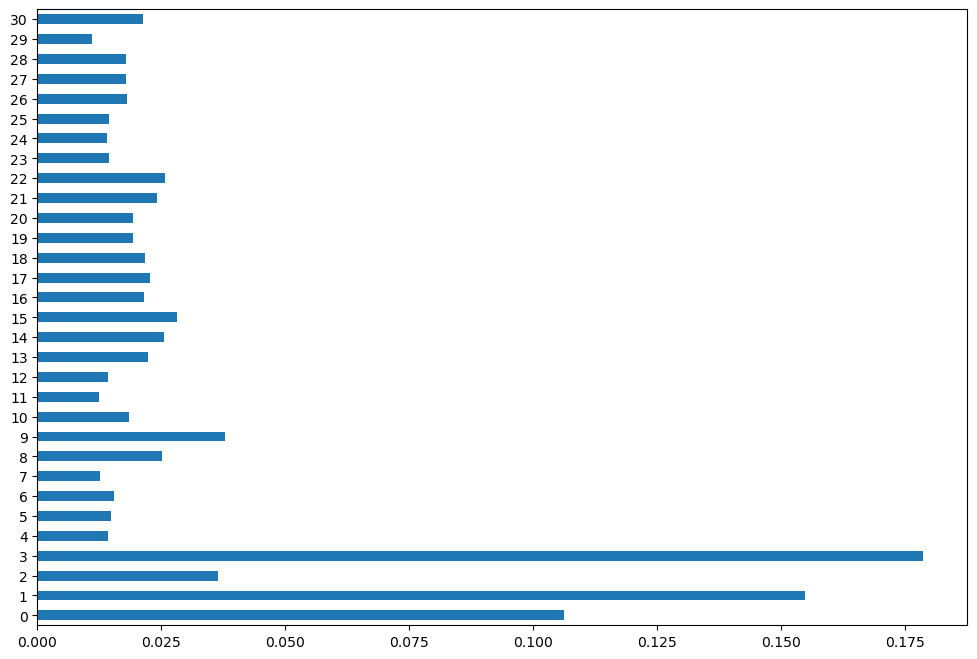

In [196]:

#  find  which features are most important for this problem. We will use feature_importances_attribute of sklearn to do it.
# find feature importance using the most accurate model

# (Logistic regression doesnt have an attribute 'feature importance')

importances = pd.Series(forest_model.feature_importances_) #here random forest model is used
importances.plot(kind='barh', figsize=(12,8))